# Case Study :Policy Lapse Prediction for PLI

<img src="files/download.jfif" width="1000" height="600">


This case study will help us to understand the stages in the data science project lifecycle with the PLI policy data set to predict whether their is a chance of the policy being lapsed. We will focus on the following four stages namely -

- Business Understanding
- Data Preparation
- Exploratory Data Analysis
- Feature Engineering
- Model Building and Selection

# Business Understanding

PLI sells insurance policies to a wide array of individuals and groups. In this business PLI covers the health of the policy holder in exchange of a premium fee which is paid by the policy holder periodically, for eg it could be annualy, semi annualy etc. Due to various reasons it is seen that the policy holder fails to make the payment of premium on time or wihin the due date which causes a disruption in the agreed business process which is known as policy lapse. a prolonged state of a policy in a lapsed state could even lead to the termination of the policy.
It will help the PLI team to have an idea about what policy has a higher chance of getting lapsed so that they could take the necessary business steps.As of now their is no visibility for the business to know that not until after the policy is lapsed.So based on the information provided to us like customer segment data, policy bought data we will be trying to predict ehather a poilcy has a chance of getting lapsed.

we have reframed this problem statement into a binary classification problem whether a policy will lapse or not. ain a classification problem discrete values are predicted based on a given set of independent variable(s).

Input Data
3 type of details will be gathered
        1.   Policy details :
              Policy term, frequency, sum insured, premium term, premium, agent info, policy maturity date, policy type.
 
    	2.   Client specific details:
                     	DOB, Gender , Marital Status, annual income
 
    	3.   Cases raised against policy
                      	Counter for cases against policy for complain and concern will be used.
 
 	Another use of a flag based signal on the lapse of maturity date with green, orange and reg signal   Is parked aside for now
 
Output

The prediction will be the chances of the policy status being as “Lapsed” state.
Analysis will be done both as a risk value (0-1) as well as a binary value (lapse/not lapse).
 
Steps and approach:-

1. Perform visualization of the features.
2. Re-engineer features for modelling
3. Perform correlation to study dependance of features with target variable
4. Select subset of active features  and flush out dormant ones.
5. Model building
6. Output assessment and optimization of models.


# Data preparation

<img src="files/bi.jfif" width="600" height="600">


In [276]:
import pandas as pd
df = pd.read_csv('pli_policy_details_ai.csv')

C:\Users\skr25\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,12,13,19,20,22,24,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [211]:
#total no of columns
df.columns

Index(['id', 'policy_id', 'policy_term', 'premium_term', 'policy_status',
       'risk_comm_date', 'maturity_date', 'sundry_bal_amt',
       'total_prem_outs_bal', 'premium_frequency', 'payment_method', 'premium',
       'next_due_date', 'last_pay_rec_date', 'propsal_date', 'proposal_number',
       'branch', 'agent_code', 'date_of_lapse', 'policy_id_c',
       'counter_info_c', 'info_c', 'pivc_status_c', 'policy_type_c',
       'policyname_c', 'sum_assured_c', 'account_id', 'account_id_c',
       'balance_c', 'date_of_birth_c', 'current_age_c', 'marital_status_c',
       'no_of_children_c', 'gender_c', 'annual_income_c', 'count_of_concern',
       'count_of_complaint'],
      dtype='object')

In [5]:
#shape of the dataset - 1716547 rows and 37 columns
df.shape

(1716547, 37)

In [364]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import confusion_matrix


#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
#ConvergenceWarning

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

C:\Users\skr25\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.inspection import permutation_importance
#import shap

In [4]:
# Data display coustomization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,id,policy_id,policy_term,premium_term,policy_status,risk_comm_date,maturity_date,sundry_bal_amt,total_prem_outs_bal,premium_frequency,...,account_id_c,balance_c,date_of_birth_c,current_age_c,marital_status_c,no_of_children_c,gender_c,annual_income_c,count_of_concern,count_of_complaint
0,1,00426336,10.0,7.0,Contract Proposal,2016-06-15,2026-06-15,0.00,NaN,Annual,...,50000019,NaN,2007-01-01,NaN,NaN,NaN,NaN,NaN,0,0
1,2,00559430,12.0,7.0,In Force,2018-01-11,2030-01-11,2446.29,NaN,Monthly,...,50000164,NaN,1985-08-10,NaN,Married,NaN,Female,250000.0,0,0
2,3,00490255,10.0,5.0,Policy Terminated,2017-03-31,2027-03-31,0.00,NaN,Annual,...,50001184,NaN,1976-01-10,NaN,Married,NaN,Male,0.0,0,0
3,4,00559311,15.0,1.0,In Force,2018-01-12,2033-01-12,0.09,NaN,Single,...,50001339,NaN,1959-12-29,NaN,Married,NaN,Male,0.0,0,0
4,5,00603706,25.0,10.0,In Force,2018-05-31,2043-05-31,6.58,NaN,Annual,...,50002206,NaN,1973-01-28,NaN,Married,NaN,Male,0.0,0,0


# Duplicates

In [475]:
df_dub = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dub.drop_duplicates(subset=None, inplace=True)
df_dub.shape

(1716547, 37)

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716547 entries, 0 to 1716546
Data columns (total 37 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id                   int64  
 1   policy_id            object 
 2   policy_term          float64
 3   premium_term         float64
 4   policy_status        object 
 5   risk_comm_date       object 
 6   maturity_date        object 
 7   sundry_bal_amt       float64
 8   total_prem_outs_bal  float64
 9   premium_frequency    object 
 10  payment_method       object 
 11  premium              float64
 12  next_due_date        object 
 13  last_pay_rec_date    object 
 14  propsal_date         object 
 15  proposal_number      object 
 16  branch               object 
 17  agent_code           int64  
 18  date_of_lapse        object 
 19  policy_id_c          object 
 20  counter_info_c       object 
 21  info_c               float64
 22  pivc_status_c        object 
 23  policy_type_c        object 
 24

In [213]:
df.describe()

,id,policy_term,premium_term,sundry_bal_amt,total_prem_outs_bal,premium,agent_code,info_c,sum_assured_c,balance_c,current_age_c,no_of_children_c,annual_income_c,count_of_concern,count_of_complaint
count,1716547.00000,1716545.00000,1699546.00000,1710478.00000,0.00000,1699546.00000,1716547.00000,0.00000,1716545.00000,0.00000,1.00000,0.00000,1692413.00000,1716547.00000,1716547.00000
mean,858274.00000,90.87280,88.99314,522.58347,nan,26965.89339,70011630.63223,nan,297520191.40687,nan,38.00000,nan,172662.52603,0.00105,0.00979
std,495524.58060,95.10203,98.08312,5187.50695,nan,67322.91372,14011.38137,nan,274991021202.55310,nan,nan,nan,1874507.57933,0.05394,0.14303
min,1.00000,0.00000,0.00000,-300000.00000,nan,-546903.80000,70000001.00000,nan,0.00000,nan,38.00000,nan,0.00000,0.00000,0.00000
25%,429137.50000,15.00000,10.00000,0.00000,nan,3446.00000,70000017.00000,nan,140410.00000,nan,38.00000,nan,0.00000,0.00000,0.00000
50%,858274.00000,36.00000,36.00000,0.00000,nan,12787.44500,70006885.00000,nan,360409.00000,nan,38.00000,nan,0.00000,0.00000,0.00000
75%,1287410.50000,180.00000,182.00000,0.00000,nan,33004.80500,70021341.00000,nan,877061.00000,nan,38.00000,nan,280000.00000,0.00000,0.00000
max,1716547.00000,360.00000,365.00000,2500000.00000,nan,20000000.00000,70063083.00000,nan,254760000000000.00000,nan,38.00000,nan,1464799398.00000,33.00000,47.00000


In [12]:
#checking null values
df.isnull().sum()

id                           0
policy_id                    0
policy_term                  2
premium_term             17001
policy_status            17568
risk_comm_date               0
maturity_date             2576
sundry_bal_amt            6069
total_prem_outs_bal    1716547
premium_frequency         2685
payment_method          449435
premium                  17001
next_due_date           944657
last_pay_rec_date      1364683
propsal_date                 0
proposal_number           1319
branch                   53801
agent_code                   0
date_of_lapse           355495
policy_id_c                  0
counter_info_c         1716535
info_c                 1716547
pivc_status_c          1643144
policy_type_c                0
policyname_c                 0
sum_assured_c                2
account_id                   0
account_id_c                 0
balance_c              1716547
date_of_birth_c              0
current_age_c          1716546
marital_status_c        155054
no_of_ch

In [304]:
#checking null values as a percentage
round(100*(df.isnull().sum()/len(df.index)), 2)

id                       0.00
policy_id                0.00
policy_term              0.00
premium_term             0.99
policy_status            1.02
risk_comm_date           0.00
maturity_date            0.15
sundry_bal_amt           0.35
total_prem_outs_bal    100.00
premium_frequency        0.16
payment_method          26.18
premium                  0.99
next_due_date           55.03
last_pay_rec_date       79.50
propsal_date             0.00
proposal_number          0.08
branch                   3.13
agent_code               0.00
date_of_lapse           20.71
policy_id_c              0.00
counter_info_c         100.00
info_c                 100.00
pivc_status_c           95.72
policy_type_c            0.00
policyname_c             0.00
sum_assured_c            0.00
account_id               0.00
account_id_c             0.00
balance_c              100.00
date_of_birth_c          0.00
current_age_c          100.00
marital_status_c         9.03
no_of_children_c       100.00
gender_c  

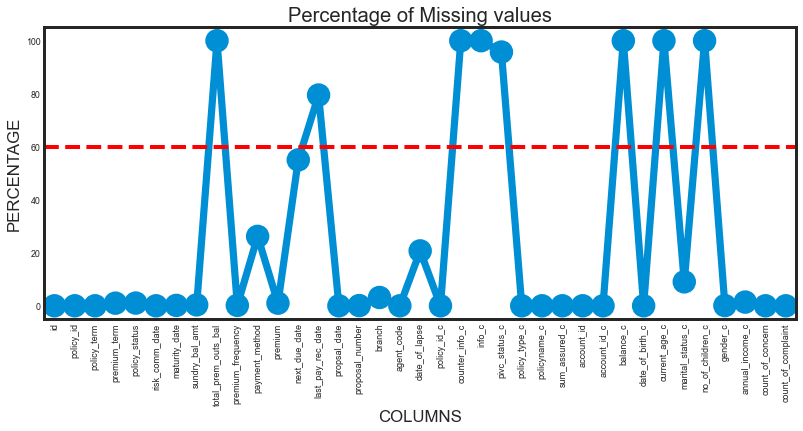

In [214]:
#plotting the null value percentage
sns.set_style("white")
fig = plt.figure(figsize=(12,5))
null_lead = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_lead)
plt.xticks(rotation =90,fontsize =9)
ax.axhline(60, ls='--',color='red')
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [277]:
# we will drop the columns having more than 60% NA values.
df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>60)].columns, 1,inplace= True)

In [278]:
#seperating the categorical and numerical features
categorical_col = df.select_dtypes(exclude =["number"]).columns.values
numerical_col = df.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['policy_id' 'policy_status' 'risk_comm_date' 'maturity_date'
 'premium_frequency' 'payment_method' 'next_due_date' 'propsal_date'
 'proposal_number' 'branch' 'date_of_lapse' 'policy_id_c' 'policy_type_c'
 'policyname_c' 'account_id' 'account_id_c' 'date_of_birth_c'
 'marital_status_c' 'gender_c'] 


NUMERICAL FEATURES : 
 ['id' 'policy_term' 'premium_term' 'sundry_bal_amt' 'premium' 'agent_code'
 'sum_assured_c' 'annual_income_c' 'count_of_concern' 'count_of_complaint'] 


## categorical values null treatment

In [279]:
# Checking unique values and null values for the categorical columns
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["unique_values_percent"] = (df[value].nunique()/len(df.index)*100)
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [280]:
df_cat = Cat_info(df, categorical_col)
df_cat

,values,unique_values,null_values,null_percent,unique_values_percent
columns,,,,,
next_due_date,"[nan, 2020-10-11, 2018-03-31, 2019-01-12, 2021...",4675,944657,55.00000,0.27235
payment_method,"[Cheque, Direct Debits, Automated Clearing Hou...",8,449435,26.20000,0.00047
date_of_lapse,"[nan, 2017-06-04, 2017-09-16, 2019-06-23, 2017...",10,355495,20.70000,0.00058
marital_status_c,"[nan, Married, UnMarried, Widow, Divorcee, Wid...",9,155054,9.00000,0.00052
branch,"[nan, PLIL- HO, PLIL- FARIDABAD, PLIL- PATIALA...",7407,53801,3.10000,0.43151
policy_status,"[Contract Proposal, In Force, Policy Terminate...",33,17568,1.00000,0.00192
premium_frequency,"[Annual, Monthly, Single, Semi Annual, Quarter...",5,2685,0.20000,0.00029
maturity_date,"[2026-06-15, 2030-01-11, 2027-03-31, 2033-01-1...",21222,2576,0.20000,1.23632
proposal_number,"[AF999999999, DF000635074, AF004598104, AF0049...",1042970,1319,0.10000,60.75977


In [281]:
# Appending the columns to col_to_drop where only 1 category value is present
cols_to_drop = df_cat[df_cat['unique_values_percent'] >= 95].index.values.tolist() 
cols_to_drop

['policy_id_c', 'policyname_c', 'policy_id']

In [282]:
#dropping unnecessary columns
df.drop(cols_to_drop, 1, inplace = True)
len(df.columns)

26

### checking new null values and percentage

In [30]:
categorical_col = df.select_dtypes(exclude =["number"]).columns.values
new_cat = Cat_info(df, categorical_col)
new_cat

,values,unique_values,null_values,null_percent,unique_values_percent
columns,,,,,
next_due_date,"[nan, 2020-10-11, 2018-03-31, 2019-01-12, 2021...",4675,944657,55.0,0.272349
payment_method,"[Cheque, Direct Debits, Automated Clearing Hou...",8,449435,26.2,0.000466
date_of_lapse,"[nan, 2017-06-04, 2017-09-16, 2019-06-23, 2017...",10,355495,20.7,0.000583
marital_status_c,"[nan, Married, UnMarried, Widow, Divorcee, Wid...",9,155054,9.0,0.000524
branch,"[nan, PLIL- HO, PLIL- FARIDABAD, PLIL- PATIALA...",7407,53801,3.1,0.431506
policy_status,"[Contract Proposal, In Force, Policy Terminate...",33,17568,1.0,0.001922
premium_frequency,"[Annual, Monthly, Single, Semi Annual, Quarter...",5,2685,0.2,0.000291
maturity_date,"[2026-06-15, 2030-01-11, 2027-03-31, 2033-01-1...",21222,2576,0.2,1.236319
proposal_number,"[AF999999999, DF000635074, AF004598104, AF0049...",1042970,1319,0.1,60.759769


<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.1 payment method
            </span>   
        </font>    
</h3>

In [31]:
#checking payment method tags and the percentage of records
df['payment_method'].value_counts(normalize=True)*100

NEFT                          36.687996
Cheque                        30.399523
Direct Debits                 16.907345
Automated Clearing House       8.560806
Auto Debit (Clone of Cash)     3.207451
ECS                            2.695263
Direct Billing (Cash)          1.344317
Credit Card                    0.197299
Name: payment_method, dtype: float64

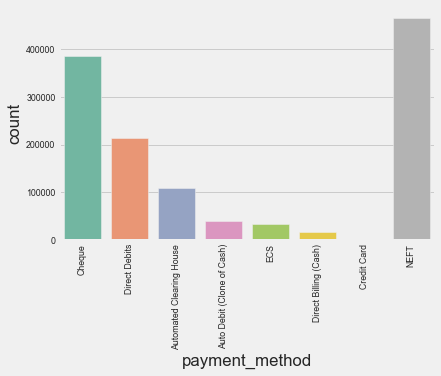

In [34]:
style.use('fivethirtyeight')
ax = sns.countplot(df['payment_method'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

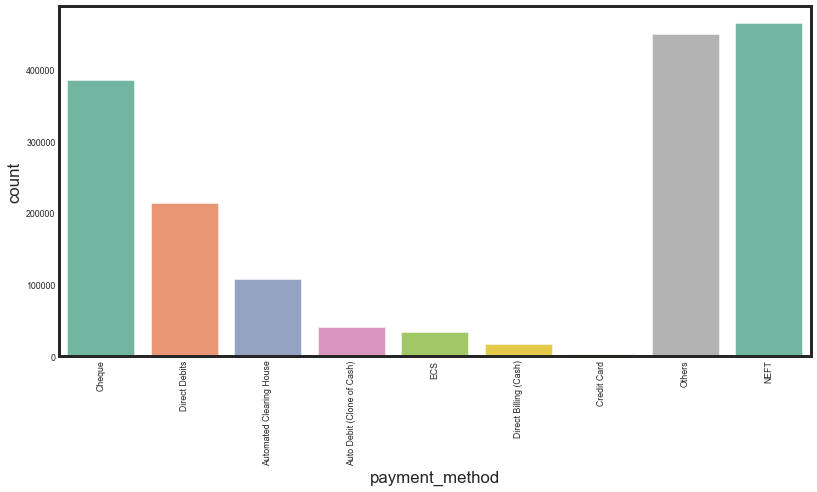

In [283]:
#as there are significant amt of null values , so imputing them with tag "Others" and plotting
df['payment_method'] = df['payment_method'].replace(np.nan, 'Others')
plt.figure(figsize=(12,6))
ax = sns.countplot(df['payment_method'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.2 marital status
            </span>   
        </font>    
</h3>

In [36]:
#checking marital statuses and the percentage of records
df['marital_status_c'].value_counts(normalize=True)*100

Married      80.562833
UnMarried    12.884720
Single        5.848249
Widow         0.485497
Widower       0.102786
Divorcee      0.093116
Widowed       0.015882
Divorced      0.006788
Company       0.000128
Name: marital_status_c, dtype: float64

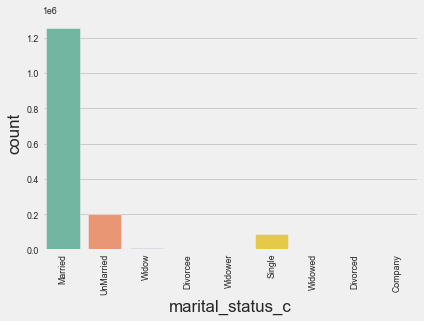

In [37]:
style.use('fivethirtyeight')
ax = sns.countplot(df['marital_status_c'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

In [510]:
#checking no of marital status records with null
df[df['marital_status_c'].isnull() ].shape[0]

155054

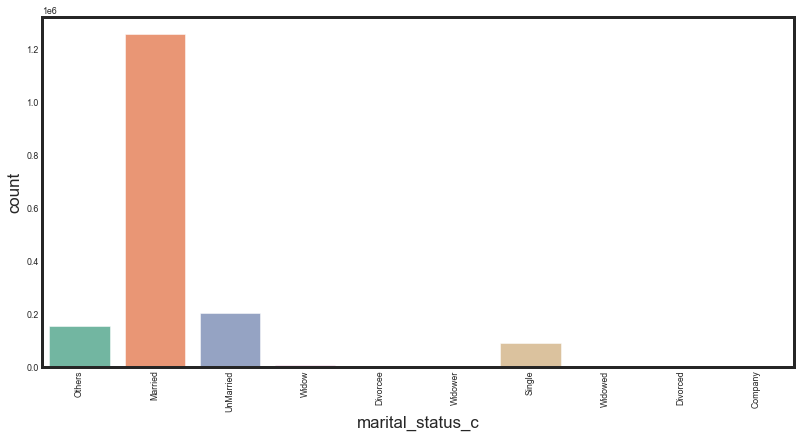

In [284]:
#as there are significant amt of null values , so imputing them with tag "Others" and plotting
df['marital_status_c'] = df['marital_status_c'].replace(np.nan, 'Others')
plt.figure(figsize=(12,6))
ax = sns.countplot(df['marital_status_c'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.3 branch
            </span>   
        </font>    
</h3>

In [13]:
#checking no of unique branch
df['branch'].nunique()

7407

In [36]:
##checking branch tags and the percentage of records only top 20 as there are 7000+ unique values
df['branch'].value_counts(normalize=True)[:20]*100

PLIL- HO             26.761736
PLIL- KOLKATA         1.224884
PLIL- MUMBAI          1.166332
PLIL- GURGAON         1.010387
PLIL- BHUBANESWAR     0.769932
PLIL- LUCKNOW         0.711960
Ahmedabad             0.682781
Lucknow               0.675116
Rajkot                0.660559
PLIL- CHANDIGARH      0.623972
Surat                 0.619334
PLIL- BATHINDA        0.592345
PLIL- BANGALORE       0.566451
Mumbai Metro          0.547256
PLIL- HYDERABAD       0.525226
PLIL- PATHANKOT       0.513954
Indore                0.505322
PLIL- JALANDHAR       0.505322
PLIL- JAMMU           0.504807
Dehradun              0.497915
Name: branch, dtype: float64

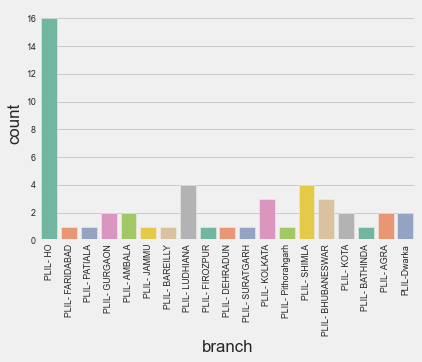

In [43]:
style.use('fivethirtyeight')
ax = sns.countplot(df['branch'][:50],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

In [285]:
#imputing null branch values with 'PLIL-HO' as it is the most significant record
df['branch'] = df['branch'].replace(np.nan, 'PLIL- HO')
'''plt.figure(figsize=(12,6))
ax = sns.countplot(df['marital_status_c'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()'''

"plt.figure(figsize=(12,6))\nax = sns.countplot(df['marital_status_c'],palette = 'Set2')\nplt.xticks(rotation = 90)\nplt.show()"

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.4 policy status --> Target variable
            </span>   
        </font>    
</h3>

In [45]:
#checking policy status tags and the percentage of records
df['policy_status'].value_counts(normalize=True)*100

In Force                         59.824047
Policy Terminated                13.930425
Full Surrender                    6.087303
Paid Up Contract                  3.818705
Contract Surrendered              3.462609
Contract Lapsed                   2.814220
Matured                           2.178191
Cancel From Inception             1.974539
Not taken Up                      1.452166
Free look Cancellation            1.321970
Reduced Surrender                 0.699420
Disc. Terminated                  0.448446
Terminated by various reasons     0.351093
Cancelled from Inception          0.346031
Contract Declined                 0.284347
Permanent Discontinuance          0.248738
Death Claim Processed             0.247619
Approved Death Claim              0.227725
Contract Matured                  0.071984
Contract Proposal                 0.062979
Contract Postponed                0.057858
Death Repudiate                   0.046911
Underwriting                      0.010065
Auto Termin

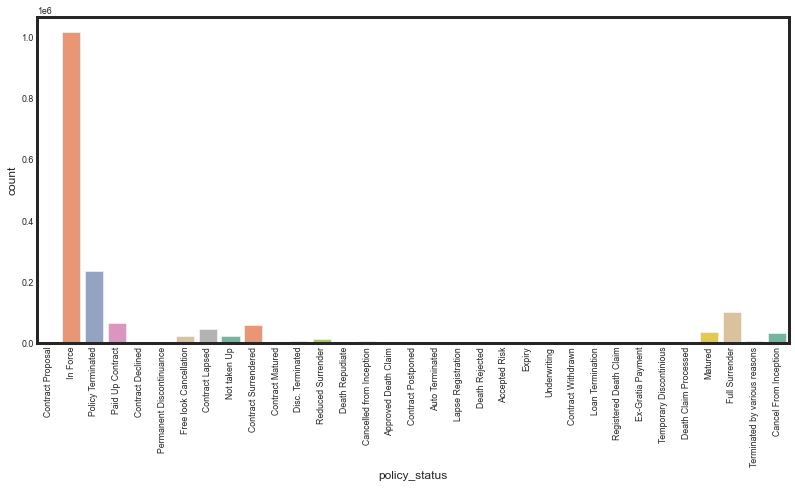

In [48]:
#df['policy_status'] = df['policy_status'].replace(np.nan, 'In Force')
plt.figure(figsize=(12,6))
ax = sns.countplot(df['policy_status'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br> removing all records with policy status as null<br> combining the green tags as not lapsed i.e 0            <br> combinig all in red tags as lapsed i.e 1 <br> removing all records with tags in grey
          </span>    
</div>

<img src="files/policy_status.jpg" width="1000" height="600">


In [286]:
#removing records with status null
df = df.loc[df['policy_status'].notnull()]
df.reset_index(drop=True, inplace=True)

In [287]:
# removing all grey records
df_ = df[(df['policy_status'] == 'Contract Withdrawn') | (df['policy_status'] == 'Underwriting') | (df['policy_status'] == 'Contract Postponed') | (df['policy_status'] == 'Contract Proposal') |  (df['policy_status'] == 'Contract Declined') | (df['policy_status'] == 'Cancelled from Inception') | (df['policy_status'] == 'Free look Cancellation') | (df['policy_status'] == 'Cancel From Inception') | (df['policy_status'] == 'Not taken Up')]

In [288]:
df.drop(df_.index, inplace = True)

In [289]:
df.reset_index(drop = True, inplace=True)

In [290]:
#checking new percentage after removal of records
df['policy_status'].value_counts(normalize=True)*100

In Force                        63.31432
Policy Terminated               14.74316
Full Surrender                   6.44245
Paid Up Contract                 4.04150
Contract Surrendered             3.66463
Contract Lapsed                  2.97841
Matured                          2.30527
Reduced Surrender                0.74023
Disc. Terminated                 0.47461
Terminated by various reasons    0.37158
Permanent Discontinuance         0.26325
Death Claim Processed            0.26207
Approved Death Claim             0.24101
Contract Matured                 0.07618
Death Repudiate                  0.04965
Auto Terminated                  0.00947
Death Rejected                   0.00885
Accepted Risk                    0.00573
Registered Death Claim           0.00374
Loan Termination                 0.00156
Lapse Registration               0.00125
Expiry                           0.00062
Ex-Gratia Payment                0.00044
Temporary Discontinious          0.00006
Name: policy_sta

In [291]:
#combinig the green and red tags-- green as 0 and red as 1
df['policy_status'] = df['policy_status'].map({'In Force' : 0, 'Policy Terminated' : 1 ,'Full Surrender' : 1, 'Contract Surrendered' : 1,  'Paid Up Contract' :0, 'Contract Lapsed' :1, 'Matured' :0, 'Reduced Surrender' : 0, 'Terminated by various reasons' : 1, 'Death Claim Processed':0, 'Approved Death Claim':0, 'Contract Matured' : 0, 'Disc. Terminated' :1, 'Permanent Discontinuance' : 0, 'Auto Terminated' :1, 'Death Repudiate' : 0 , 'Death Rejected' : 0, 'Accepted Risk' : 0, 'Registered Death Claim' : 0, 'Loan Termination' :1, 'Lapse Registration' : 1, 'Expiry' : 0, 'Ex-Gratia Payment' : 0, 'Temporary Discontinious' : 0  })

In [292]:
df['policy_status'].value_counts()

0    1144801
1     460520
Name: policy_status, dtype: int64

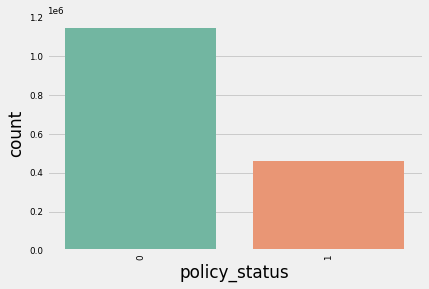

In [104]:
style.use('fivethirtyeight')
ax = sns.countplot(df['policy_status'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.4 prem freq
            </span>   
        </font>    
</h3>

In [49]:
df['premium_frequency'].value_counts(normalize=True)*100

Single         55.137578
Annual         25.997776
Monthly        15.740824
Semi Annual     2.555107
Quarterly       0.568716
Name: premium_frequency, dtype: float64

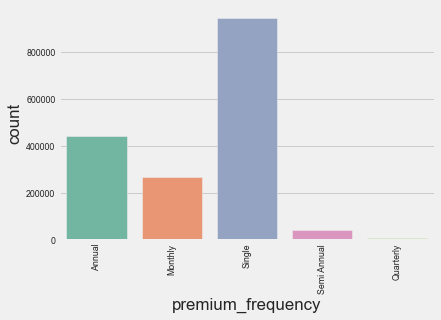

In [50]:
style.use('fivethirtyeight')
ax = sns.countplot(df['premium_frequency'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

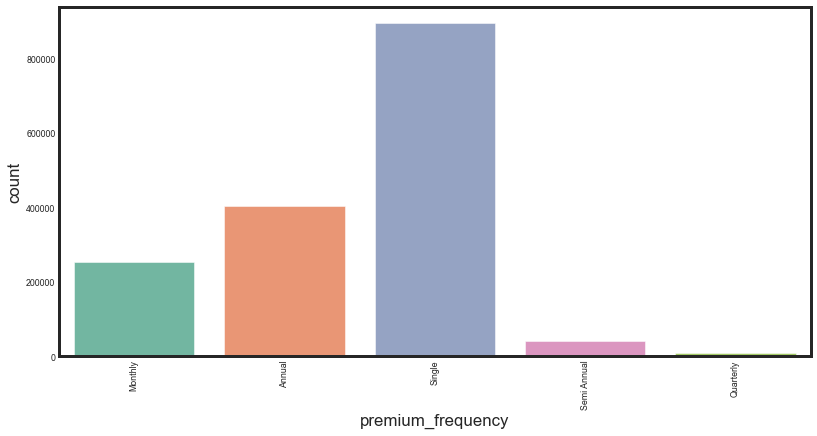

In [293]:
#replacing null premium frequency with Single as it has the most significant values
df['premium_frequency'] = df['premium_frequency'].replace(np.nan, 'Single')
plt.figure(figsize=(12,6))
ax = sns.countplot(df['premium_frequency'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.5 gender
            </span>   
        </font>    
</h3>

In [58]:
df.head()

,id,policy_term,premium_term,policy_status,risk_comm_date,maturity_date,sundry_bal_amt,premium_frequency,payment_method,premium,next_due_date,propsal_date,proposal_number,branch,agent_code,date_of_lapse,policy_type_c,sum_assured_c,account_id,account_id_c,date_of_birth_c,marital_status_c,gender_c,annual_income_c,count_of_concern,count_of_complaint
0,2,12.0,7.0,0,2018-01-11,2030-01-11,2446.29,Monthly,Direct Debits,2392.0,2020-10-11,2018-01-11,DF000635074,PLIL- HO,70006885,NaN,Individual,121800.0,50000164,50000164,1985-08-10,Married,Female,250000.0,0,0
1,3,10.0,5.0,1,2017-03-31,2027-03-31,0.00,Annual,Cheque,26937.0,2018-03-31,2017-03-31,AF004598104,PLIL- HO,70010263,2017-06-04,Individual,684900.0,50001184,50001184,1976-01-10,Married,Male,0.0,0,0
2,4,15.0,1.0,0,2018-01-12,2033-01-12,0.09,Single,Cheque,82500.0,2019-01-12,2018-01-12,AF004937435,PLIL- FARIDABAD,70041932,NaN,Individual,90750.0,50001339,50001339,1959-12-29,Married,Male,0.0,0,0
3,5,25.0,10.0,0,2018-05-31,2043-05-31,6.58,Annual,Automated Clearing House,30622.0,2021-05-31,2018-05-31,Z3379400069,PLIL- HO,70001019,NaN,Individual,222851.0,50002206,50002206,1973-01-28,Married,Male,0.0,0,0
4,6,25.0,10.0,0,2018-06-12,2043-06-12,0.00,Annual,Automated Clearing House,27482.0,2020-06-12,2018-06-12,Z3379400070,PLIL- HO,70001019,2017-06-04,Individual,40000.0,50002206,50002206,1973-01-28,Married,Male,0.0,0,0


In [59]:
df['gender_c'].value_counts(normalize=True)*100

Male      86.002154
Female    13.997846
Name: gender_c, dtype: float64

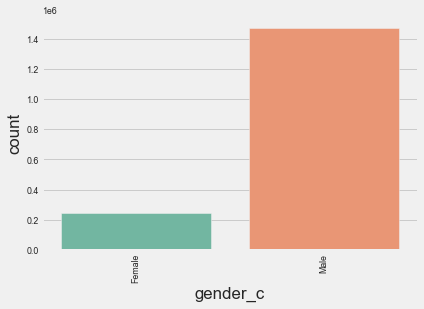

In [53]:
style.use('fivethirtyeight')
ax = sns.countplot(df['gender_c'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

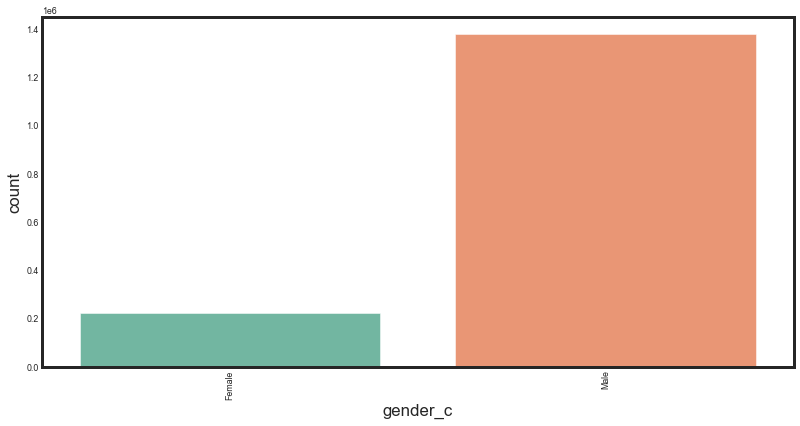

In [294]:
#imputing null gender with  ale as it has the most significant values
df['gender_c'] = df['gender_c'].replace(np.nan, 'Male')
plt.figure(figsize=(12,6))
ax = sns.countplot(df['gender_c'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.6 policy type
            </span>   
        </font>    
</h3>

In [60]:
df['policy_type_c'].value_counts(normalize=True)*100

Group         54.3733
Individual    45.6267
Name: policy_type_c, dtype: float64

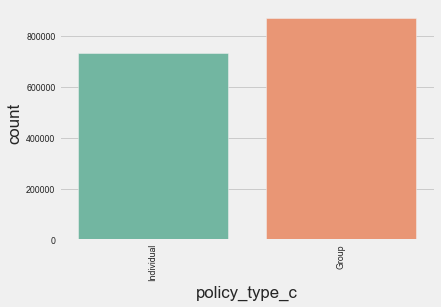

In [62]:
style.use('fivethirtyeight')
ax = sns.countplot(df['policy_type_c'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.7 age
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          New feature “AGE” (at what age policy was purchased )could not be calculated as “proposal date” has value “1900-01-01” for 54% of data, for all these data the “date of lapse” is also 1900-01-01. Dropping this as of now. Have to find a way to calculate. NOT USING THIS FOR NOW
    </span>    
</div>



In [291]:
df['propsal_date'] = pd.to_datetime(df['propsal_date'])
df['date_of_birth_c'] = pd.to_datetime(df['date_of_birth_c'], errors = 'coerce')

In [292]:
df['age'] = (df['propsal_date']  - df['date_of_birth_c'])/np.timedelta64(1, 'Y')

In [299]:
df[df['propsal_date'] == '1900-01-01 00:00:00']['date_of_lapse'].head()

792672    1900-01-01
792673    1900-01-01
792674    1900-01-01
792675    1900-01-01
792676    1900-01-01
Name: date_of_lapse, dtype: object

In [303]:
df[df['date_of_lapse'] == '1900-01-01']['date_of_lapse'].count()

923874

In [118]:
#one example where dates are 01-01-1900
df.loc[1563048]

id                                1665332
policy_term                            72
premium_term                           73
policy_status                           0
risk_comm_date                 2019-10-23
maturity_date                  2025-10-22
sundry_bal_amt                          0
premium_frequency                  Single
payment_method                     Others
premium                           2837.81
next_due_date                         NaN
propsal_date          1900-01-01 00:00:00
proposal_number                       NaN
branch                          HYDERABAD
agent_code                       70000017
date_of_lapse                  1900-01-01
policy_type_c                       Group
sum_assured_c                      500539
account_id                      GE3265104
account_id_c                    GE3265104
date_of_birth_c       2002-10-30 00:00:00
marital_status_c                   Others
gender_c                             Male
annual_income_c                   

<a id="numnull"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.4 Numerical Columns Null Value Treatment
            </span>   
        </font>    
</h2>

In [63]:
# Checking unique values and null values for the categorical columns
def Num_info(df, numeric_column):
    df_result = pd.DataFrame(columns=["columns","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in numeric_column:
        df_temp["columns"] = [value]
        df_temp['unq_val_percent'] = df[value].nunique()/len(df)*100
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [64]:
df_num = Num_info(df,numerical_col)
df_num

,null_values,null_percent,unq_val_percent
columns,,,
annual_income_c,23142,1.4,0.650213
sundry_bal_amt,5910,0.4,2.210337
premium_term,755,0.0,0.004983
premium,755,0.0,36.125298
id,0,0.0,100.000000
policy_term,0,0.0,0.007164
agent_code,0,0.0,0.763087
sum_assured_c,0,0.0,34.354251
count_of_concern,0,0.0,0.000561


<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.1 annual income
            </span>   
        </font>    
</h3>

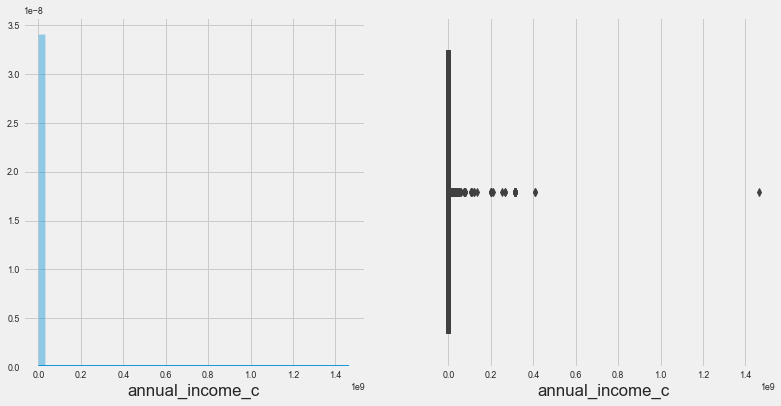

In [65]:
#checking distribution and box plot
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['annual_income_c'])
plt.subplot(1,2,2)
sns.boxplot(df['annual_income_c'])
plt.show()

In [98]:
#checking stats on annual income 
df['annual_income_c'].describe().apply(lambda x: format(x, 'f'))

count       1692413.000000
mean         172662.526029
std         1874507.579329
min               0.000000
25%               0.000000
50%               0.000000
75%          280000.000000
max      1464799398.000000
Name: annual_income_c, dtype: object

In [71]:
df[df['annual_income_c'] == 0 ]['annual_income_c'].count()/len(df)

0.5537964058278687

In [70]:
df[df['annual_income_c'] == 0 & df['date_of_lapse'].str.contains('1900-01-01')]['annual_income_c'].count()/len(df)

0.5537964058278687

In [72]:
df[df['annual_income_c'] == 0 & df['propsal_date'].str.contains('1900')]['annual_income_c'].count()/len(df)

0.5537964058278687

In [295]:
#replacing null annual income with medial which is 0
df['annual_income_c'] = df['annual_income_c'].replace(np.nan, df['annual_income_c'].median())
#plt.figure(figsize=(12,6))
#ax = sns.countplot(df['gender_c'],palette = 'Set2')
#plt.xticks(rotation = 90)
#plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          for 55 % of records all three features - annual income , date of lapse and proposal date are blank
    </span>    
</div>



<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.2 premium
            </span>   
        </font>    
</h3>

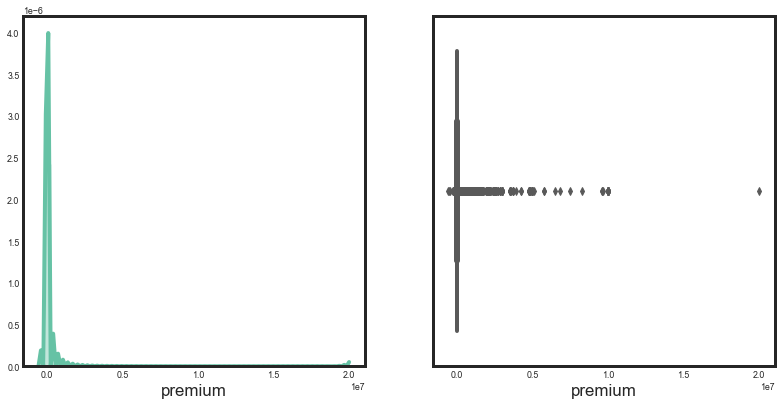

In [386]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['premium'])
plt.subplot(1,2,2)
sns.boxplot(df['premium'])
plt.show()

In [91]:
df['premium'].describe().apply(lambda x: format(x, 'f'))

count     1604566.000000
mean        26273.002860
std         66121.686016
min       -546903.800000
25%          3373.000000
50%         12256.185000
75%         32137.740000
max      20000000.000000
Name: premium, dtype: object

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br> removing all premium less than 0 records total 1080 in total
</div>

In [92]:
df[df['premium'] < 0]['premium'].count()

1080

In [93]:
df[df['premium'] == 0]['premium'].count()

52

In [296]:
df = df.loc[df['premium'] >= 0]
df.reset_index(drop=True, inplace=True)

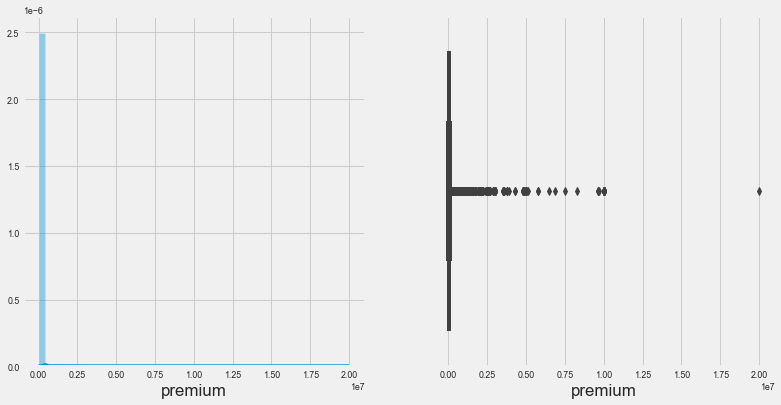

In [97]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['premium'])
plt.subplot(1,2,2)
sns.boxplot(df['premium'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          presence of outliers , so plotting 15-85 percentile
    </span>    
</div>



In [28]:
df[df['premium'] > 0]['premium'].count()

1603434

In [98]:
tt = df[(df['premium'] > df['premium'].quantile(.15)) & (df['premium'] < df['premium'].quantile(.85))]['premium']


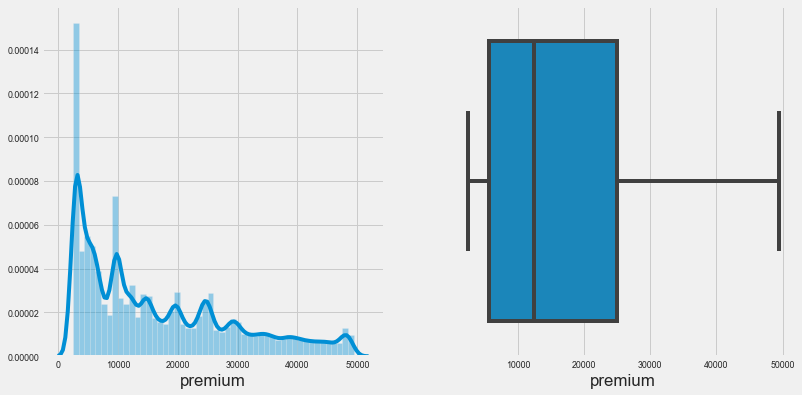

In [100]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(tt)
plt.subplot(1,2,2)
sns.boxplot(tt)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.2 premium term
            </span>   
        </font>    
</h3>

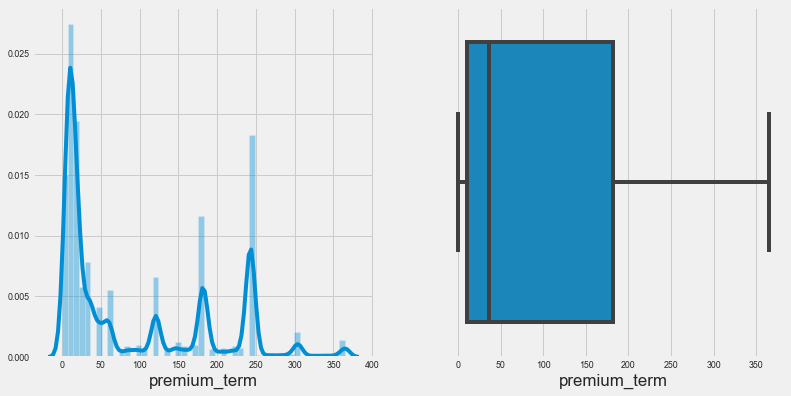

In [108]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['premium_term'])
plt.subplot(1,2,2)
sns.boxplot(df['premium_term'])
plt.show()

In [109]:
df['premium_term'].describe().apply(lambda x: format(x, 'f'))

count    1699546.000000
mean          88.993138
std           98.083115
min            0.000000
25%           10.000000
50%           36.000000
75%          182.000000
max          365.000000
Name: premium_term, dtype: object

In [297]:
#replacing null premium term with median value
df['premium_term'] = df['premium_term'].replace(np.nan, df['premium_term'].median())


<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.3 sundry bal amount
            </span>   
        </font>    
</h3>

C:\Users\skr25\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


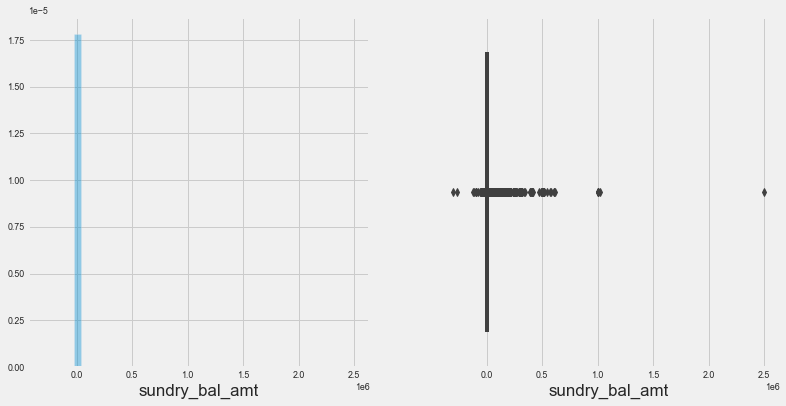

In [111]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['sundry_bal_amt'])
plt.subplot(1,2,2)
sns.boxplot(df['sundry_bal_amt'])
plt.show()

In [112]:
df['sundry_bal_amt'].describe().apply(lambda x: format(x, 'f'))

count    1710478.000000
mean         522.583471
std         5187.506955
min      -300000.000000
25%            0.000000
50%            0.000000
75%            0.000000
max      2500000.000000
Name: sundry_bal_amt, dtype: object

In [113]:
#82% sundry balance is having 0 value
df[df['sundry_bal_amt'] == 0]['sundry_bal_amt'].count()/len(df)

0.8254519101428623

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.4 policy term
            </span>   
        </font>    
</h3>

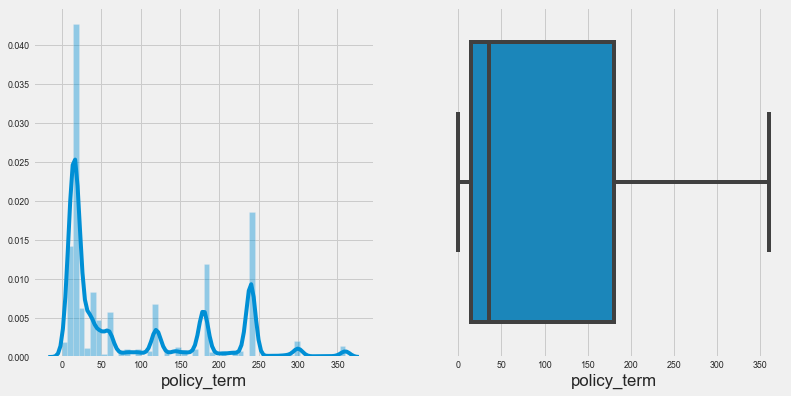

In [114]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['policy_term'])
plt.subplot(1,2,2)
sns.boxplot(df['policy_term'])
plt.show()

In [115]:
df['policy_term'].describe().apply(lambda x: format(x, 'f'))

count    1716545.000000
mean          90.872801
std           95.102032
min            0.000000
25%           15.000000
50%           36.000000
75%          180.000000
max          360.000000
Name: policy_term, dtype: object

In [298]:
#replacing null policy term with median value
df['policy_term'] = df['policy_term'].replace(np.nan, df['policy_term'].median())


<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.4 sum_assured_c
            </span>   
        </font>    
</h3>

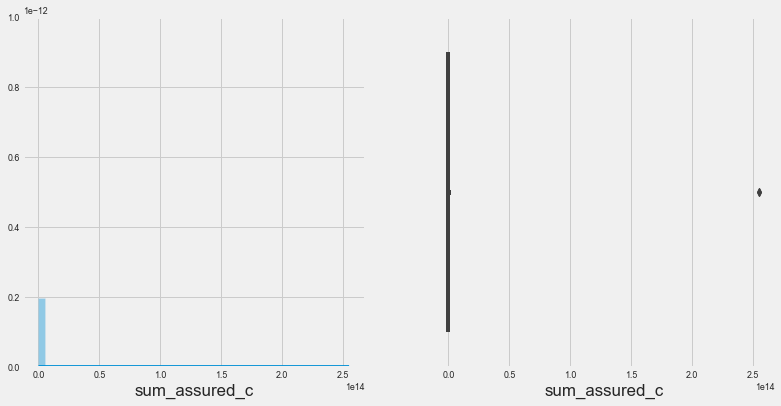

In [117]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['sum_assured_c'])
plt.subplot(1,2,2)
sns.boxplot(df['sum_assured_c'])
plt.show()

In [118]:
df['sum_assured_c'].describe().apply(lambda x: format(x, 'f'))

count            1716545.000000
mean           297520191.406873
std         274991021202.553101
min                    0.000000
25%               140410.000000
50%               360409.000000
75%               877061.000000
max      254760000000000.000000
Name: sum_assured_c, dtype: object

In [119]:
df[df['sum_assured_c'] == 0]['sum_assured_c'].count()/len(df)

0.013418216920363964

In [121]:
tt = df[(df['sum_assured_c'] > df['sum_assured_c'].quantile(.15)) & (df['sum_assured_c'] < df['sum_assured_c'].quantile(.85))]['sum_assured_c']


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          presence of outliers , so plotting 15-85 percentile
    </span>    
</div>



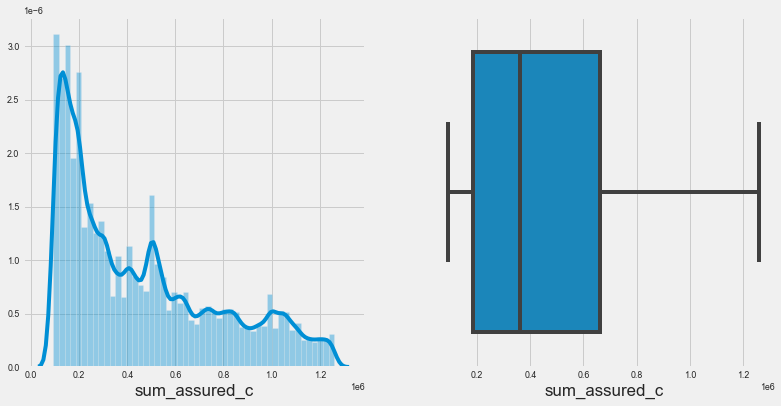

In [123]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(tt)
plt.subplot(1,2,2)
sns.boxplot(tt)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.5 agent code
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br> as unique id will be dropped later
</div>

In [31]:
#no of unique agent code- as UID will be dropped later
df['agent_code'].nunique()

12250

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.5 count of concern
            </span>   
        </font>    
</h3>

C:\Users\skr25\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


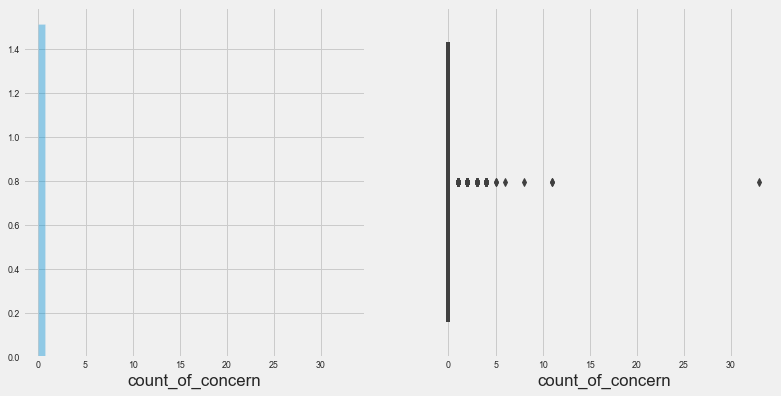

In [126]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['count_of_concern'])
plt.subplot(1,2,2)
sns.boxplot(df['count_of_concern'])
plt.show()

In [127]:
df['count_of_concern'].describe().apply(lambda x: format(x, 'f'))

count    1716547.000000
mean           0.001046
std            0.053939
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max           33.000000
Name: count_of_concern, dtype: object

In [128]:
df[df['count_of_concern'] == 0]['count_of_concern'].count()/len(df)

0.9994605449195391

In [136]:
tti = df[(df['count_of_concern'] > df['count_of_concern'].quantile(.90))]['count_of_concern']

C:\Users\skr25\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


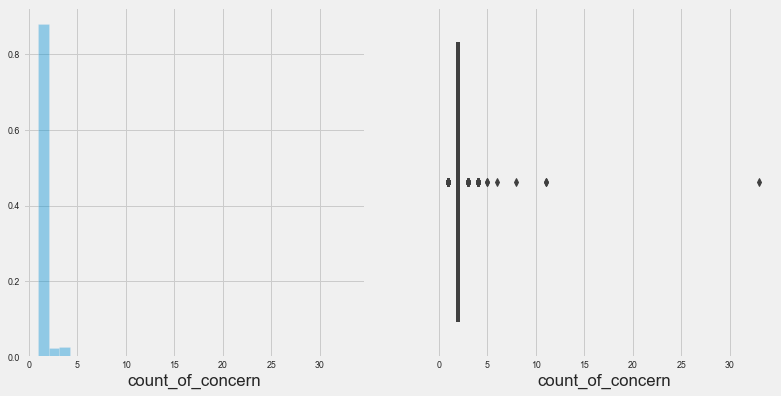

In [137]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(tti)
plt.subplot(1,2,2)
sns.boxplot(tti)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.5 count of complaint
            </span>   
        </font>    
</h3>

C:\Users\skr25\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


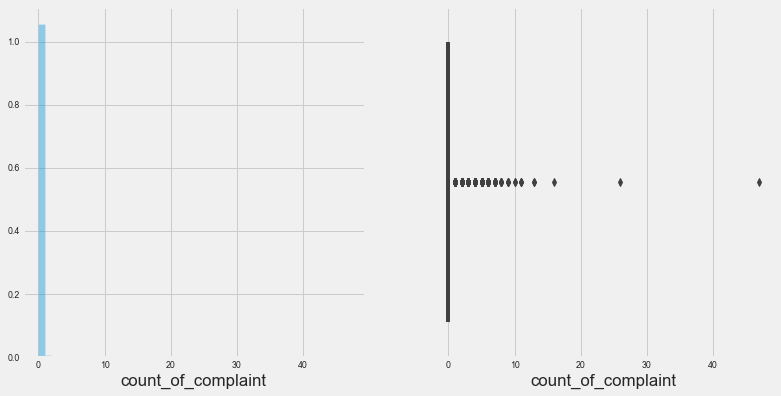

In [139]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['count_of_complaint'])
plt.subplot(1,2,2)
sns.boxplot(df['count_of_complaint'])
plt.show()

In [140]:
df['count_of_complaint'].describe().apply(lambda x: format(x, 'f'))

count    1716547.000000
mean           0.009795
std            0.143030
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max           47.000000
Name: count_of_complaint, dtype: object

In [141]:
df[df['count_of_complaint'] == 0]['count_of_complaint'].count()/len(df)

0.993030193755254

In [142]:
ttij = df[(df['count_of_complaint'] > df['count_of_complaint'].quantile(.90))]['count_of_complaint']

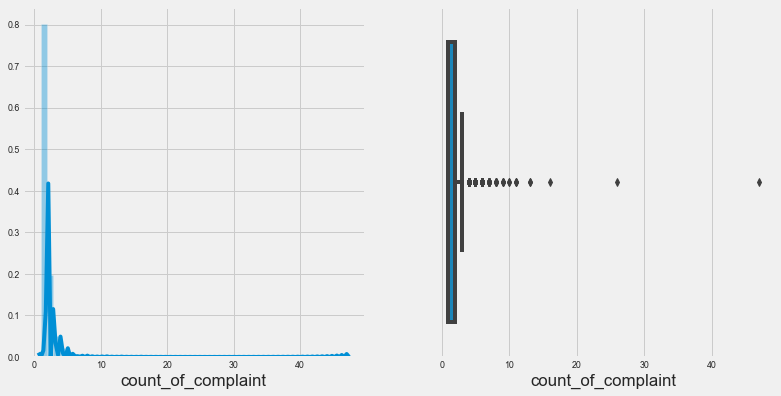

In [143]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(ttij)
plt.subplot(1,2,2)
sns.boxplot(ttij)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          count of concern and complaint is having 99% 0 values, tried plotting with removal of outliers
    </span>    
</div>



<img src="files/imputation.jpg" width="400" height="600">


# Exploratory Data Analysis 

<img src="files/eda.jfif" width="800" height="600">


<a id="imbalance"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.1 Data Imbalance
            </span>   
        </font>    
</h2>

In [129]:
lapsed = df['policy_status'].value_counts().rename_axis('policy_status').to_frame('counts')
lapsed

,counts
policy_status,
0,1144801
1,460520


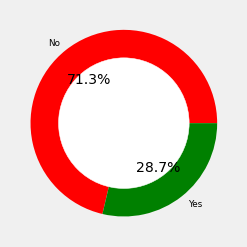

In [131]:

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(lapsed.counts, labels = ['No','Yes'],colors = ['red','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


<a id="graphfunc"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.2 Graph Functions
            </span>   
        </font>    
</h2>

In [137]:
# function for plotting repetitive countplots in univariate categorical analysis on the dataset
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t lapsed; 
# 2. Percentage of lapsed within column

def univariate_categorical(feature,label_rotation=False,horizontal_layout=True):
    temp_count = df[feature].value_counts()
    temp_perc = df[feature].value_counts(normalize = True)
    df1 = pd.DataFrame({feature: temp_count.index,'Total Lapsed': temp_count.values,'% Values': temp_perc.values * 100})
    print(df1)
    
    # Calculate the percentage of Converted=1 per category value
    cat_perc = df[[feature, 'policy_status']].groupby([feature],as_index=False).mean()
    cat_perc["policy_status"] = cat_perc["policy_status"]*100
    cat_perc.sort_values(by='policy_status', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))   
    # 1. Subplot 1: Count plot of categorical column
    sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df,
                    hue ="policy_status",
                    order=cat_perc[feature],
                    palette=['r','g'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['Not lapsed','lapsed'])
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='policy_status', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of lapse [%]', fontsize=15)
    plt.xlabel(feature,fontsize=15) 
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + "( lapsed % )", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [134]:
df.columns

Index(['policy_term', 'premium_term', 'policy_status', 'risk_comm_date',
       'maturity_date', 'sundry_bal_amt', 'premium_frequency',
       'payment_method', 'premium', 'next_due_date', 'propsal_date',
       'proposal_number', 'branch', 'agent_code', 'date_of_lapse',
       'policy_type_c', 'sum_assured_c', 'account_id', 'account_id_c',
       'date_of_birth_c', 'marital_status_c', 'gender_c', 'annual_income_c',
       'count_of_concern', 'count_of_complaint', 'age'],
      dtype='object')

     policy_term  Total Lapsed   % Values
0           15.0        237020  14.764648
1          240.0        216283  13.472882
2           20.0        151936   9.464525
3          180.0        139058   8.662317
4           10.0        103620   6.454784
5           36.0         91869   5.722781
6          120.0         78034   4.860959
7           60.0         67098   4.179725
8           16.0         58222   3.626814
9           24.0         52763   3.286757
10          48.0         50346   3.136195
11          12.0         47330   2.948320
12          18.0         37832   2.356663
13         300.0         24556   1.529663
14          25.0         18304   1.140208
15         360.0         17018   1.060100
16           5.0         15847   0.987155
17         144.0         14862   0.925796
18          96.0         11534   0.718486
19         168.0         11246   0.700545
20          84.0         11145   0.694254
21         156.0         10987   0.684411
22         216.0         10454   0

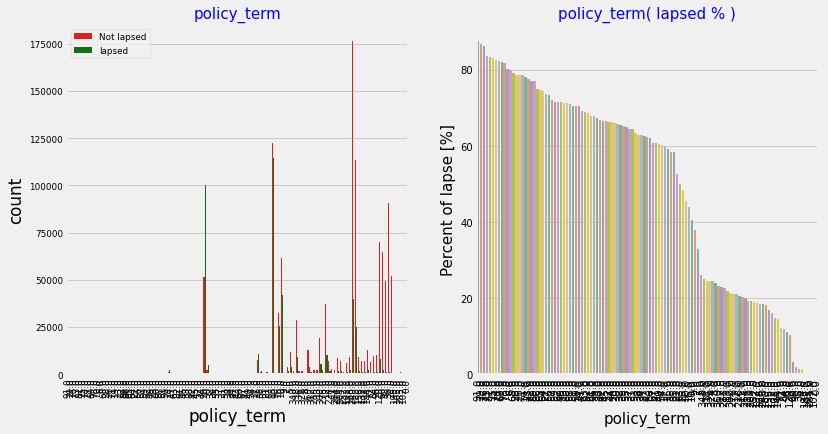

In [138]:
#checking policy term and premium term for both categorical and numerical analysis
univariate_categorical("policy_term",label_rotation=True)

    premium_term  Total Lapsed   % Values
0           10.0        223748  13.937898
1          243.0        216232  13.469705
2          182.0        139010   8.659327
3           15.0        119153   7.422378
4            7.0        104254   6.494277
5           20.0         99394   6.191534
6           36.0         91628   5.707768
7          121.0         77975   4.857284
8           12.0         73975   4.608113
9           60.0         66725   4.156490
10          24.0         52627   3.278285
11          48.0         49455   3.080692
12           5.0         46079   2.870392
13         304.0         24552   1.529414
14           1.0         22559   1.405264
15         365.0         17018   1.060100
16          25.0         15205   0.947163
17         146.0         14849   0.924986
18           8.0         11654   0.725961
19          97.0         11525   0.717925
20         170.0         11244   0.700421
21          85.0         11111   0.692136
22         158.0         10986   0

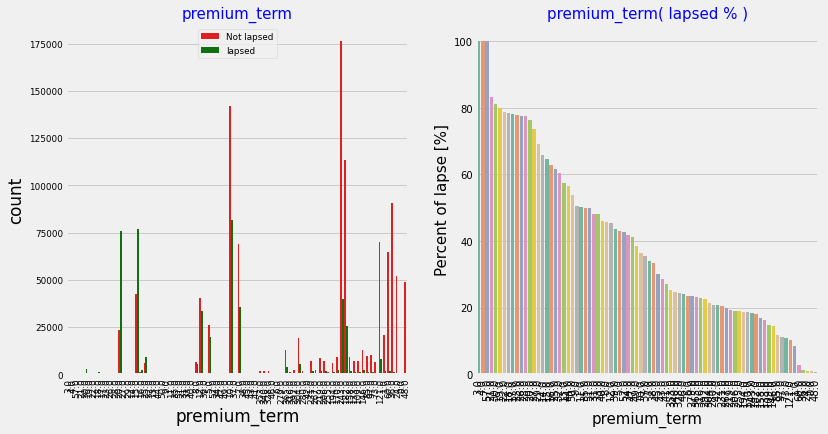

In [139]:
univariate_categorical("premium_term",label_rotation=True)

  premium_frequency  Total Lapsed   % Values
0            Single        895472  55.781492
1            Annual        405373  25.251834
2           Monthly        254931  15.880375
3       Semi Annual         40768   2.539554
4         Quarterly          8777   0.546744


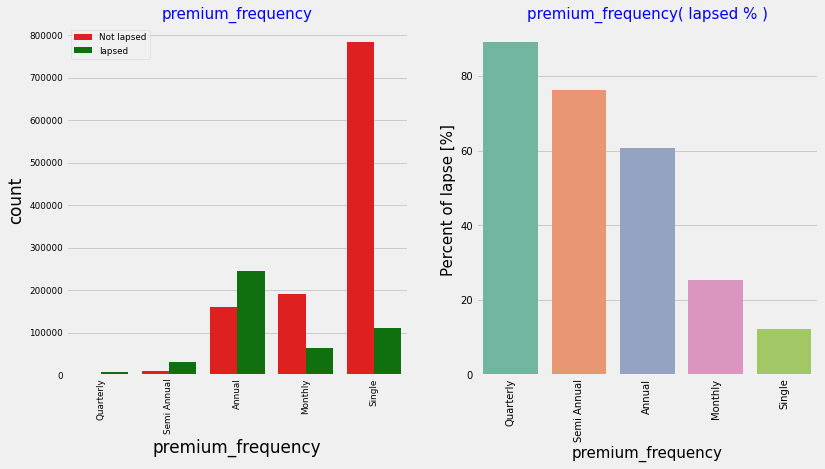

In [140]:
univariate_categorical("premium_frequency",label_rotation=True)

               payment_method  Total Lapsed   % Values
0                        NEFT        441683  27.513687
1                      Others        422168  26.298043
2                      Cheque        359623  22.401937
3               Direct Debits        211461  13.172506
4    Automated Clearing House        107506   6.696854
5                         ECS         31348   1.952756
6       Direct Billing (Cash)         16619   1.035245
7  Auto Debit (Clone of Cash)         12429   0.774238
8                 Credit Card          2484   0.154735


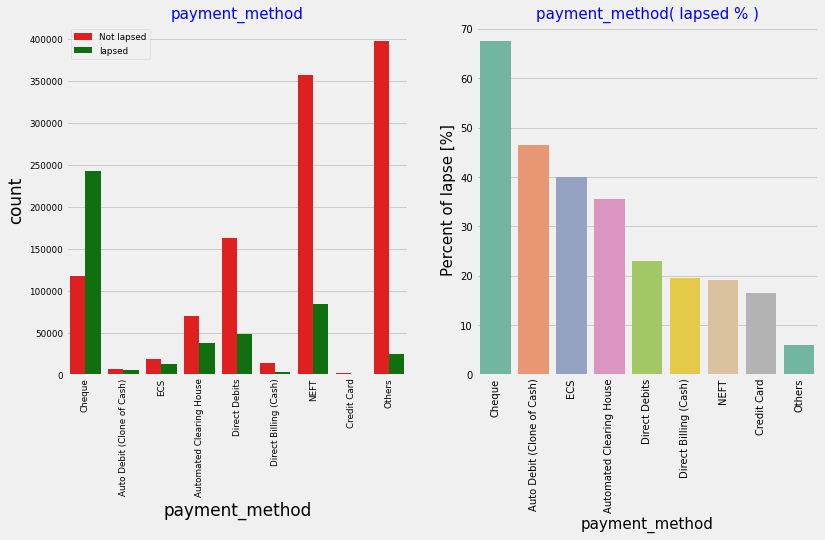

In [141]:
univariate_categorical("payment_method",label_rotation=True)

  policy_type_c  Total Lapsed  % Values
0         Group        872866   54.3733
1    Individual        732455   45.6267


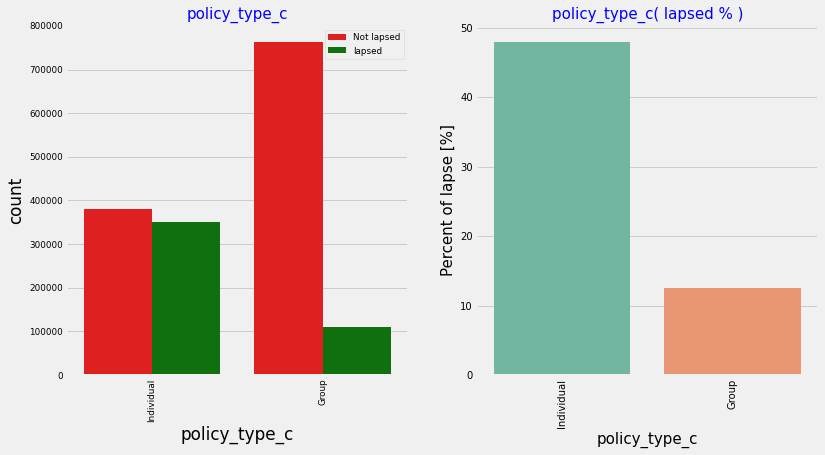

In [143]:
univariate_categorical("policy_type_c",label_rotation=True)

  marital_status_c  Total Lapsed   % Values
0          Married       1171263  72.961296
1        UnMarried        188746  11.757524
2           Others        149599   9.318946
3           Single         86105   5.363725
4            Widow          6615   0.412067
5          Widower          1402   0.087335
6         Divorcee          1267   0.078925
7          Widowed           225   0.014016
8         Divorced            98   0.006105
9          Company             1   0.000062


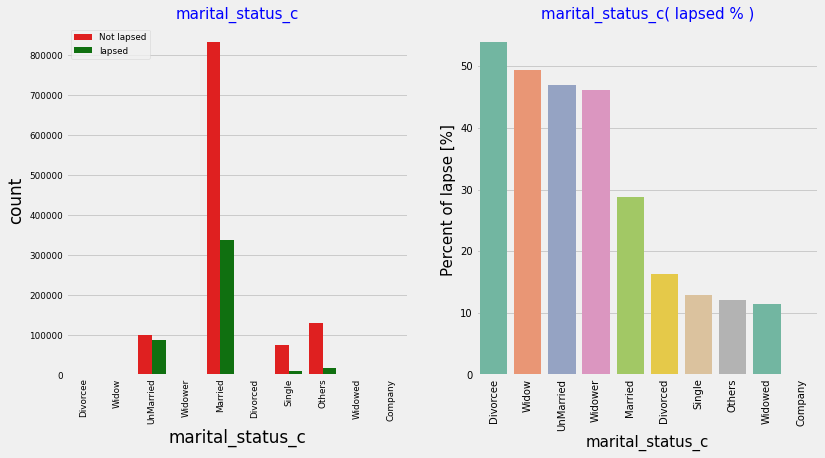

In [144]:
univariate_categorical("marital_status_c",label_rotation=True)

  gender_c  Total Lapsed   % Values
0     Male       1380781  86.012766
1   Female        224540  13.987234


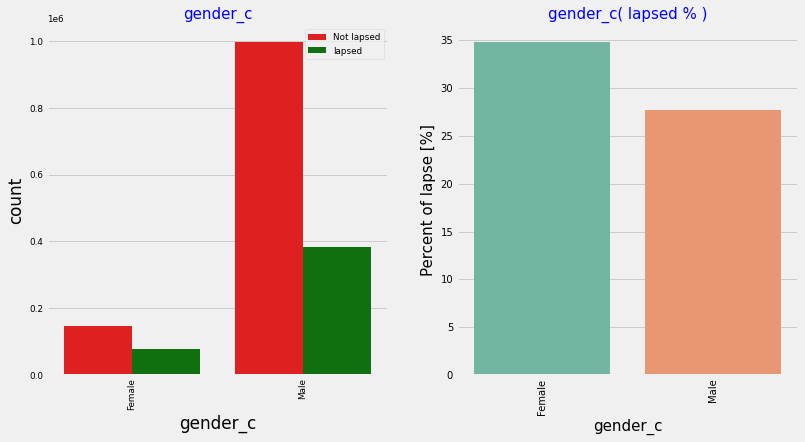

In [145]:
univariate_categorical("gender_c",label_rotation=True)

<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.4 Univariate Analysis - Numerical
            </span>   
        </font>    
</h2>

In [146]:
df.columns

Index(['policy_term', 'premium_term', 'policy_status', 'risk_comm_date',
       'maturity_date', 'sundry_bal_amt', 'premium_frequency',
       'payment_method', 'premium', 'next_due_date', 'propsal_date',
       'proposal_number', 'branch', 'agent_code', 'date_of_lapse',
       'policy_type_c', 'sum_assured_c', 'account_id', 'account_id_c',
       'date_of_birth_c', 'marital_status_c', 'gender_c', 'annual_income_c',
       'count_of_concern', 'count_of_complaint', 'age'],
      dtype='object')

C:\Users\skr25\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\skr25\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


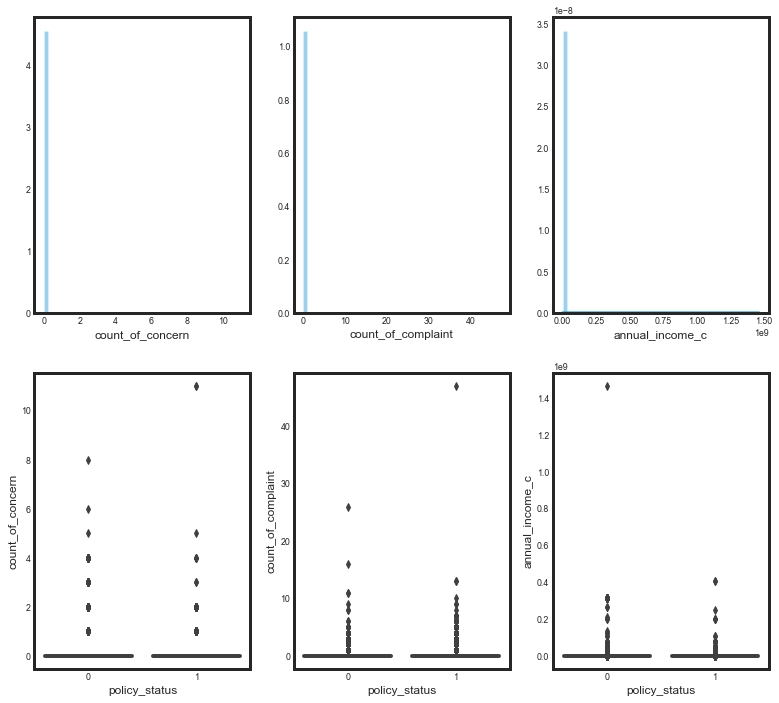

In [28]:
numerical_cols = ['count_of_concern', 'count_of_complaint', 'annual_income_c']
plt.figure(figsize=(20,12))

i=1
for col in numerical_cols:
    plt.subplot(2,5,i)
    sns.distplot(df[col])
    plt.subplot(2,5,5+i)
    sns.boxplot(y=df[col], x = df['policy_status'])
    i+=1

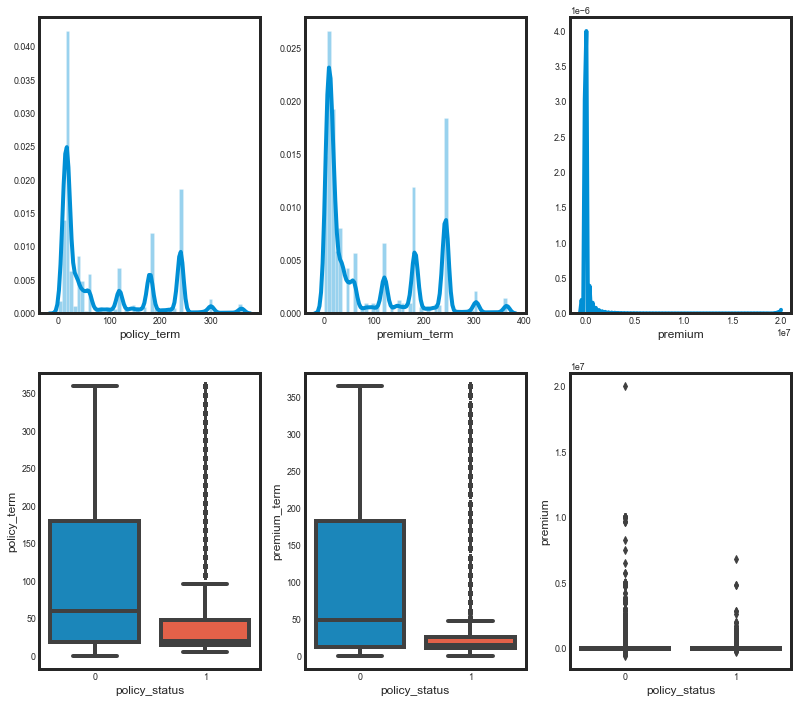

In [30]:
numerical_cols = ['policy_term', 'premium_term', 'premium']
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(df[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=df[col], x = df['policy_status'])
    i+=1

In [31]:
#removing outliers for premium and sum assured
tt = df[(df['sum_assured_c'] > df['sum_assured_c'].quantile(.15)) & (df['sum_assured_c'] < df['sum_assured_c'].quantile(.85))]['sum_assured_c']
ttj = df[(df['premium'] > df['premium'].quantile(.15)) & (df['premium'] < df['premium'].quantile(.85))]['premium']

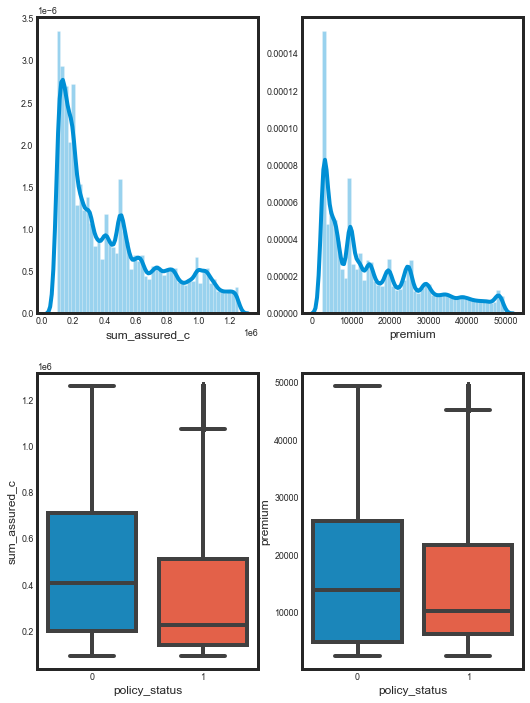

In [33]:
numerical_cols = [tt,ttj]
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(col)
    plt.subplot(2,3,3+i)
    sns.boxplot(y=col, x = df['policy_status'])
    i+=1

<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.5 Dropping columns
            </span>   
        </font>    
</h2>

<img src="files/drop_cols.jpg" width="1000" height="1000">


In [299]:
df.drop(['id', 'risk_comm_date','maturity_date','sundry_bal_amt','account_id','account_id_c','date_of_birth_c','proposal_number','next_due_date','propsal_date'], axis =1, inplace = True)

In [300]:
df.drop(['agent_code','date_of_lapse','branch'], inplace=True, axis =1)

In [301]:
df.columns

Index(['policy_term', 'premium_term', 'policy_status', 'premium_frequency',
       'payment_method', 'premium', 'policy_type_c', 'sum_assured_c',
       'marital_status_c', 'gender_c', 'annual_income_c', 'count_of_concern',
       'count_of_complaint'],
      dtype='object')

In [302]:
df.isnull().sum()

policy_term           0
premium_term          0
policy_status         0
premium_frequency     0
payment_method        0
premium               0
policy_type_c         0
sum_assured_c         0
marital_status_c      0
gender_c              0
annual_income_c       0
count_of_concern      0
count_of_complaint    0
dtype: int64

In [341]:
df.head()

,policy_term,premium_term,policy_status,premium_frequency,payment_method,premium,policy_type_c,sum_assured_c,marital_status_c,gender_c,annual_income_c,count_of_concern,count_of_complaint
0,12.0,7.0,0,Monthly,Direct Debits,2392.0,Individual,121800.0,Married,Female,250000.0,0,0
1,10.0,5.0,1,Annual,Cheque,26937.0,Individual,684900.0,Married,Male,0.0,0,0
2,15.0,1.0,0,Single,Cheque,82500.0,Individual,90750.0,Married,Male,0.0,0,0
3,25.0,10.0,0,Annual,Automated Clearing House,30622.0,Individual,222851.0,Married,Male,0.0,0,0
4,25.0,10.0,0,Annual,Automated Clearing House,27482.0,Individual,40000.0,Married,Male,0.0,0,0


# Feature Engineering

<img src="files/fe.png" width="800" height="600">


<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.5 Feature conversion - marital status,policy status,gender
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br> For marital status combining (Widow, Widower, Widowed) as widow, (Divorcee,Divorced) as divorce and (Company) into Others <br> for policy status individual as 1, group as 0, <br> for gender Male as 1, female as 0 
</div>

In [109]:
df['marital_status_c'].value_counts()

Married      1169847
UnMarried     188746
Others        149305
Single         85980
Widow           6615
Widower         1402
Divorcee        1267
Widowed          225
Divorced          98
Company            1
Name: marital_status_c, dtype: int64

In [303]:
series = ['Widow' , 'Widower', 'Widowed']
series1 = ['Divorcee', 'Divorced']
series2 = ['Company']

In [304]:
df = df.assign(marital_status_c = np.where(df['marital_status_c'].isin(series),'widow', df['marital_status_c']))

In [305]:
df = df.assign(marital_status_c = np.where(df['marital_status_c'].isin(series1),'divorce', df['marital_status_c']))

In [306]:
df = df.assign(marital_status_c = np.where(df['marital_status_c'].isin(series2),'Others', df['marital_status_c']))

In [307]:
df['marital_status_c'].value_counts()

Married      1169847
UnMarried     188746
Others        149306
Single         85980
widow           8242
divorce         1365
Name: marital_status_c, dtype: int64

In [308]:
df['policy_type_c'] = df['policy_type_c'].map({'Individual' :1, 'Group' :0}) 

In [309]:
df['gender_c'] = df['gender_c'].map({'Male' :1, 'Female' :0}) 

<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.7 dummy encoding categotical features
            </span>   
        </font>    
</h2>

In [310]:
dummy1 = pd.get_dummies(df[['premium_frequency', 'payment_method', 'marital_status_c']], drop_first=True)
# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df = df.drop(['premium_frequency', 'payment_method', 'marital_status_c'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603486 entries, 0 to 1603485
Data columns (total 27 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   policy_term                              1603486 non-null  float64
 1   premium_term                             1603486 non-null  float64
 2   policy_status                            1603486 non-null  int64  
 3   premium                                  1603486 non-null  float64
 4   policy_type_c                            1603486 non-null  int64  
 5   sum_assured_c                            1603486 non-null  float64
 6   gender_c                                 1603486 non-null  int64  
 7   annual_income_c                          1603486 non-null  float64
 8   count_of_concern                         1603486 non-null  int64  
 9   count_of_complaint                       1603486 non-null  int64  
 10  premium_frequency_

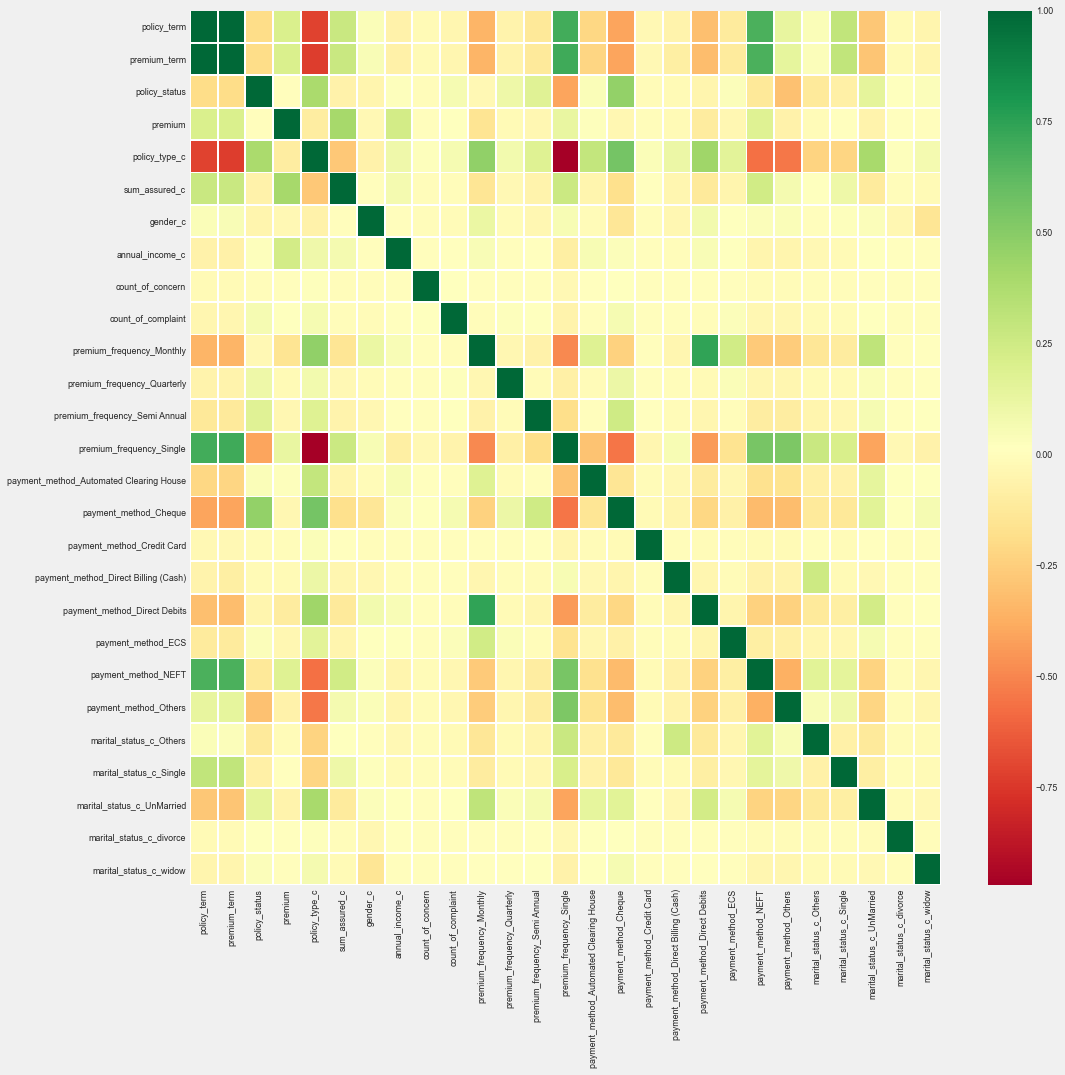

In [118]:
plt.figure(figsize=[15,15])
sns.heatmap(df.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [280]:
corr_df1 = df.corr()
corr_df1 = corr_df1.where(np.triu(np.ones(corr_df1.shape),k=1).astype(np.bool))
corr_df = corr_df1.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
28,premium_term,policy_term,0.994272
284,age,policy_type_c,0.985798
543,payment_method_Direct Debits,premium_frequency_Monthly,0.741659
393,premium_frequency_Single,premium_term,0.704553
392,premium_frequency_Single,policy_term,0.695912


In [46]:
df.columns

Index(['policy_term', 'premium_term', 'policy_status', 'premium',
       'policy_type_c', 'sum_assured_c', 'gender_c', 'annual_income_c',
       'count_of_concern', 'count_of_complaint', 'premium_frequency_Monthly',
       'premium_frequency_Quarterly', 'premium_frequency_Semi Annual',
       'premium_frequency_Single', 'payment_method_Automated Clearing House',
       'payment_method_Cheque', 'payment_method_Credit Card',
       'payment_method_Direct Billing (Cash)', 'payment_method_Direct Debits',
       'payment_method_ECS', 'payment_method_NEFT', 'payment_method_Others',
       'marital_status_c_Others', 'marital_status_c_Single',
       'marital_status_c_UnMarried', 'marital_status_c_divorce',
       'marital_status_c_widow'],
      dtype='object')

<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.8 Train-Test split
            </span>   
        </font>    
</h2>

In [354]:
# target variable
Y = df['policy_status']
X = df.drop(['policy_status'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [318]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (1122440, 26)
 Shape of y_train is :  (1122440,)
 Shape of X_test is  :  (481046, 26)
 Shape of y_test is  :  (481046,)


<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.9 Scaling numerical features
            </span>   
        </font>    
</h2>

<img src="files/scaling.jpg" width="1000" height="1000">


In [326]:
X_train.columns

Index(['policy_term', 'premium_term', 'premium', 'policy_type_c',
       'sum_assured_c', 'gender_c', 'annual_income_c', 'count_of_concern',
       'count_of_complaint', 'premium_frequency_Monthly',
       'premium_frequency_Quarterly', 'premium_frequency_Semi Annual',
       'premium_frequency_Single', 'payment_method_Automated Clearing House',
       'payment_method_Cheque', 'payment_method_Credit Card',
       'payment_method_Direct Billing (Cash)', 'payment_method_Direct Debits',
       'payment_method_ECS', 'payment_method_NEFT', 'payment_method_Others',
       'marital_status_c_Others', 'marital_status_c_Single',
       'marital_status_c_UnMarried', 'marital_status_c_divorce',
       'marital_status_c_widow'],
      dtype='object')

In [355]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[['policy_term','premium_term']] = scaler.fit_transform(X_train[['policy_term','premium_term']])
X_train.head()

,policy_term,premium_term,premium,policy_type_c,sum_assured_c,gender_c,annual_income_c,count_of_concern,count_of_complaint,premium_frequency_Monthly,premium_frequency_Quarterly,premium_frequency_Semi Annual,premium_frequency_Single,payment_method_Automated Clearing House,payment_method_Cheque,payment_method_Credit Card,payment_method_Direct Billing (Cash),payment_method_Direct Debits,payment_method_ECS,payment_method_NEFT,payment_method_Others,marital_status_c_Others,marital_status_c_Single,marital_status_c_UnMarried,marital_status_c_divorce,marital_status_c_widow
110521,0.04167,0.01918,9848.00000,1,16394.00000,1,400000.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
55405,0.05556,0.05479,25000.00000,1,250000.00000,0,500000.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1408670,0.10000,0.09863,938.13000,0,197087.00000,1,0.00000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1288674,0.33333,0.33151,20149.85000,0,968743.00000,1,0.00000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
875255,0.20000,0.20000,32714.87000,0,818281.00000,1,0.00000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [356]:
from sklearn.preprocessing import RobustScaler
RBscaler = RobustScaler()
X_train[['premium' , 'sum_assured_c']] = RBscaler.fit_transform(X_train[['premium' , 'sum_assured_c']])
X_train.head()


,policy_term,premium_term,premium,policy_type_c,sum_assured_c,gender_c,annual_income_c,count_of_concern,count_of_complaint,premium_frequency_Monthly,premium_frequency_Quarterly,premium_frequency_Semi Annual,premium_frequency_Single,payment_method_Automated Clearing House,payment_method_Cheque,payment_method_Credit Card,payment_method_Direct Billing (Cash),payment_method_Direct Debits,payment_method_ECS,payment_method_NEFT,payment_method_Others,marital_status_c_Others,marital_status_c_Single,marital_status_c_UnMarried,marital_status_c_divorce,marital_status_c_widow
110521,0.04167,0.01918,-0.08517,1,-0.46730,1,400000.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
55405,0.05556,0.05479,0.44008,1,-0.14960,0,500000.00000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1408670,0.10000,0.09863,-0.39404,0,-0.22156,1,0.00000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1288674,0.33333,0.33151,0.27195,0,0.82788,1,0.00000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
875255,0.20000,0.20000,0.70753,0,0.62325,1,0.00000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [357]:
from sklearn.preprocessing import StandardScaler

Sscaler = StandardScaler()

X_train[['annual_income_c']] = Sscaler.fit_transform(X_train[['annual_income_c']])
X_train.head()

,policy_term,premium_term,premium,policy_type_c,sum_assured_c,gender_c,annual_income_c,count_of_concern,count_of_complaint,premium_frequency_Monthly,premium_frequency_Quarterly,premium_frequency_Semi Annual,premium_frequency_Single,payment_method_Automated Clearing House,payment_method_Cheque,payment_method_Credit Card,payment_method_Direct Billing (Cash),payment_method_Direct Debits,payment_method_ECS,payment_method_NEFT,payment_method_Others,marital_status_c_Others,marital_status_c_Single,marital_status_c_UnMarried,marital_status_c_divorce,marital_status_c_widow
110521,0.04167,0.01918,-0.08517,1,-0.46730,1,0.16873,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
55405,0.05556,0.05479,0.44008,1,-0.14960,0,0.23961,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1408670,0.10000,0.09863,-0.39404,0,-0.22156,1,-0.11478,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1288674,0.33333,0.33151,0.27195,0,0.82788,1,-0.11478,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
875255,0.20000,0.20000,0.70753,0,0.62325,1,-0.11478,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [125]:
X_train.isnull().sum()

policy_term                                0
premium_term                               0
premium                                    0
policy_type_c                              0
sum_assured_c                              0
gender_c                                   0
annual_income_c                            0
count_of_concern                           0
count_of_complaint                         0
premium_frequency_Monthly                  0
premium_frequency_Quarterly                0
premium_frequency_Semi Annual              0
premium_frequency_Single                   0
payment_method_Automated Clearing House    0
payment_method_Cheque                      0
payment_method_Credit Card                 0
payment_method_Direct Billing (Cash)       0
payment_method_Direct Debits               0
payment_method_ECS                         0
payment_method_NEFT                        0
payment_method_Others                      0
marital_status_c_Others                    0
marital_st

In [358]:
X_test[['policy_term','premium_term']] = scaler.transform(X_test[['policy_term','premium_term']])

In [359]:
X_test[['premium' , 'sum_assured_c']] = RBscaler.transform(X_test[['premium' , 'sum_assured_c']])


In [360]:
X_test[['annual_income_c']] = Sscaler.fit_transform(X_test[['annual_income_c']])

# Model Building and output

<img src="files/mb.jfif" width="800" height="600">


As discussed earlier, this is binary classification, so lets explore two of the choices those are very widely used for the model preparation for binary classification.

- Logistic Regression <br> 
In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc... Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.<br>
- Random Forest Classifier <br>
A Random Forest is a decision support tool that uses a tree-like model of decisions and their possible consequences. It is one way to display an algorithm that only contains conditional control statements. It is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In [366]:
# Using RFE to reduce the feature count from 26 to 20
@ignore_warnings(category=ConvergenceWarning)
def func():
    logreg = LogisticRegression()
    rfe = RFE(logreg,20 )           
    rfe = rfe.fit(X_train, y_train)
func()

C:\Users\skr25\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [367]:
#checking the output of RFE
'''
ranking_ndarray of shape (n_features,)
The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

support_ndarray of shape (n_features,)
The mask of selected features.'''

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('policy_term', True, 1),
 ('premium_term', True, 1),
 ('premium', False, 6),
 ('policy_type_c', True, 1),
 ('sum_assured_c', False, 4),
 ('gender_c', False, 3),
 ('annual_income_c', True, 1),
 ('count_of_concern', True, 1),
 ('count_of_complaint', True, 1),
 ('premium_frequency_Monthly', True, 1),
 ('premium_frequency_Quarterly', True, 1),
 ('premium_frequency_Semi Annual', True, 1),
 ('premium_frequency_Single', True, 1),
 ('payment_method_Automated Clearing House', True, 1),
 ('payment_method_Cheque', True, 1),
 ('payment_method_Credit Card', True, 1),
 ('payment_method_Direct Billing (Cash)', True, 1),
 ('payment_method_Direct Debits', True, 1),
 ('payment_method_ECS', True, 1),
 ('payment_method_NEFT', True, 1),
 ('payment_method_Others', True, 1),
 ('marital_status_c_Others', False, 7),
 ('marital_status_c_Single', True, 1),
 ('marital_status_c_UnMarried', False, 5),
 ('marital_status_c_divorce', False, 2),
 ('marital_status_c_widow', True, 1)]

In [132]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['policy_term', 'premium_term', 'policy_type_c', 'annual_income_c',
       'count_of_concern', 'count_of_complaint', 'premium_frequency_Monthly',
       'premium_frequency_Quarterly', 'premium_frequency_Semi Annual',
       'premium_frequency_Single', 'payment_method_Automated Clearing House',
       'payment_method_Cheque', 'payment_method_Credit Card',
       'payment_method_Direct Billing (Cash)', 'payment_method_Direct Debits',
       'payment_method_ECS', 'payment_method_NEFT', 'payment_method_Others',
       'marital_status_c_Single', 'marital_status_c_widow'],
      dtype='object')

In statistics, the variance inflation factor (VIF) is the quotient of the variance in a model with multiple terms by the variance of a model with one term alone.[1] It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of collinearity.

In [133]:
# Functions to repeat Logictis regression model and VIF calculation repeatedly

# function to build logistic regression model
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list] # get feature list for VIF
    X_train_sm = sm.add_constant(X_train_local) # required by statsmodels   
    log_model = sm.GLM(y_train.astype(float),X_train_sm.astype(float), family = sm.families.Binomial()).fit() # build model and learn coefficients  
    return(log_model, X_train_sm) # return the model and the X_train fitted with constant 

#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features

In [134]:
features = list(rfe_col) #  Use RFE selected variables
log_model1, X_train_sm1 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          policy_status   No. Observations:              1122440
Model:                            GLM   Df Residuals:                  1122419
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.0573e+05
Date:                Mon, 08 Feb 2021   Deviance:                   1.0115e+06
Time:                        14:30:04   Pearson chi2:                 1.00e+16
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -4.2811      0.305    -14.036      0.000      -4.879      -3.683
policy_term                                -1.2791      0.128     -9.992      0.000      -1.530      -1.028
premium_term                                3.6321      0.129     28.131      0.000       3.379       3.885
policy_type_c                               4.4785      0.304     14.729      0.000       3.883       5.074
annual_income_c                            -0.2277      0.012    -19.598      0.000      -0.250      -0.205
count_of_concern                           -0.8527      0.054    -15.739      0.000      -0.959      -0.746
count_of_complaint                          0.6761      0.025     26.884      0.000       0.627       0.725
premium_frequency_Monthly                  -0.3415      0.011    -32.184      0.000      -0.362      -0.321
premium_frequency_Quarterly                 1.5921      0.042     37.690      0.000       1.509       1.675
premium_frequency_Semi Annual               0.5677      0.015     37.927      0.000       0.538       0.597
premium_frequency_Single                   -2.9681      0.037    -80.942      0.000      -3.040      -2.896
payment_method_Automated Clearing House    -0.6694      0.024    -28.099      0.000      -0.716      -0.623
payment_method_Cheque                       0.5369      0.024     22.721      0.000       0.491       0.583
payment_method_Credit Card                 -1.8626      0.069    -26.975      0.000      -1.998      -1.727
payment_method_Direct Billing (Cash)        0.5234      0.043     12.112      0.000       0.439       0.608
payment_method_Direct Debits               -1.1404      0.024    -48.306      0.000      -1.187      -1.094
payment_method_ECS                         -0.4337      0.027    -16.241      0.000      -0.486      -0.381
payment_method_NEFT                         4.4692      0.303     14.756      0.000       3.876       5.063
payment_method_Others                       3.6185      0.303     11.948      0.000       3.025       4.212
marital_status_c_Single                    -0.3704      0.013    -27.460      0.000      -0.397      -0.344
marital_status_c_widow                     -0.2460      0.030     -8.286      0.000      -0.304      -0.188
===========================================================================================================
"""

In [135]:
calculate_VIF(X_train[features])

,Features,VIF
1,premium_term,197.91
0,policy_term,196.03
9,premium_frequency_Single,52.86
2,policy_type_c,41.17
16,payment_method_NEFT,29.90
17,payment_method_Others,26.74
11,payment_method_Cheque,20.81
14,payment_method_Direct Debits,13.46
10,payment_method_Automated Clearing House,6.83
6,premium_frequency_Monthly,4.15


In [136]:
# Getting the predicted values on the train set
y_train_pred = log_model1.predict(X_train_sm1)
y_train_pred[:10]

110521     0.670911
55405      0.691634
1408670    0.033109
1288674    0.121728
875255     0.092518
1074852    0.080686
211493     0.704556
38917      0.814534
1036136    0.170464
925776     0.115144
dtype: float64

In [137]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
110521,0,0.670911,110521
55405,0,0.691634,55405
1408670,0,0.033109,1408670
1288674,0,0.121728,1288674
875255,0,0.092518,875255


In [138]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
110521,0,0.670911,110521,1,1,1,1,1,1,1,0,0,0
55405,0,0.691634,55405,1,1,1,1,1,1,1,0,0,0
1408670,0,0.033109,1408670,1,0,0,0,0,0,0,0,0,0
1288674,0,0.121728,1288674,1,1,0,0,0,0,0,0,0,0
875255,0,0.092518,875255,1,0,0,0,0,0,0,0,0,0


In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

,prob,accuracy,sensi,speci,Precision,Recall
0.0,0.0,0.286890,1.000000,0.000000,1.000000,0.000000
0.1,0.1,0.539792,0.951853,0.374016,0.379552,0.951853
0.2,0.2,0.637660,0.853356,0.550884,0.433241,0.853356
0.3,0.3,0.767828,0.673527,0.805766,0.582472,0.673527
0.4,0.4,0.799344,0.565815,0.893295,0.680846,0.565815
0.5,0.5,0.802540,0.543105,0.906913,0.701245,0.543105
0.6,0.6,0.802500,0.532124,0.911274,0.706986,0.532124
0.7,0.7,0.754790,0.211750,0.973260,0.761101,0.211750
0.8,0.8,0.727742,0.059519,0.996574,0.874840,0.059519
0.9,0.9,0.717302,0.016102,0.999400,0.915269,0.016102


<Figure size 1296x576 with 0 Axes>

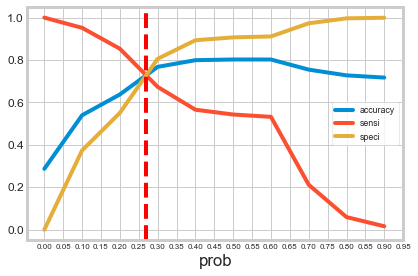

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.27, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

<span style='font-family:Georgia'>
    <font color = green>
        <h3> Confusion Matrix : </h3>
    </font>
    <table>
    <thead>
    <tr><th></th><th>Predicted Negative(0)</th><th>Predicted Positive(1)</th></tr>
    </thead>
    <tbody>
        <tr><td><b>Actual Negative(0)</b></td><td><font color = blue>True Negative (TN)</font> </td><td><font color = blue>False Postive (FP)</font></td></tr>
        <tr><td><b>Actual Positive(1)</b></td><td><font color = blue>False Negative (FN)</font></td><td><font color = blue>True Positive (TP)</font></td></tr>
    </tbody>
</table>
</span>
<hr>
<div>
    <span style="font-size:18" >
        <span style ='font-family:Georgia'>
            <font color = blue >
                <math> Accuracy = </math>
                <span style="display: inline-block;vertical-align: middle;">
                    <div style="text-align: center;border-bottom: 1px solid black;">(TP + TN)</div>
                    <div style="text-align: center;">(TP + TN + FP + FN)</div>
                </span>
            </font>
        </span>
    </span>
</div>
<hr>
<div>
    <span style="font-size:18" >
        <span style ='font-family:Georgia'>
            <font color = blue >
                <math> Sensitivity = </math>
                <span style="display: inline-block;vertical-align: middle;">
                    <div style="text-align: center;border-bottom: 1px solid black;">TP</div>
                    <div style="text-align: center;">(TP + FN)</div>
                </span>
            </font>
        </span>
    </span>
</div>
<hr>
<div>
    <span style="font-size:18" >
        <span style ='font-family:Georgia'>
            <font color = blue >
                <math> Specificity = </math>
                <span style="display: inline-block;vertical-align: middle;">
                    <div style="text-align: center;border-bottom: 1px solid black;">TN</div>
                    <div style="text-align: center;">(TN + FP)</div>
                </span>
            </font>
        </span>
    </span>
</div>
<hr>
<div>
    <span style="font-size:18" >
        <span style ='font-family:Georgia'>
            <font color = blue >
                <math> Precision = </math>
                <span style="display: inline-block;vertical-align: middle;">
                    <div style="text-align: center;border-bottom: 1px solid black;">TP</div>
                    <div style="text-align: center;">(TP + FP)</div>
                </span>
            </font>
        </span>
    </span>
</div>    
<hr>
<div>
    <span style="font-size:18" >
        <span style ='font-family:Georgia'>
            <font color = blue >
                <math> Recall = </math>
                <span style="display: inline-block;vertical-align: middle;">
                    <div style="text-align: center;border-bottom: 1px solid black;">TP</div>
                    <div style="text-align: center;">(TP + FN)</div>
                </span>
            </font>
        </span>
    </span>
</div>
<hr>
<div>
    <span style="font-size:18" >
        <span style ='font-family:Georgia'>
            <font color = blue >
                <math> F Measure (F1) = 2 * </math>
                <span style="display: inline-block;vertical-align: middle;">
                    <div style="text-align: center;border-bottom: 1px solid black;"> Precision * Recall </div>
                    <div style="text-align: center;">(Precision + Recall)</div>
                </span>
            </font>
        </span>
    </span>
</div>
<hr>
<div>
    <span style="font-size:18" >
        <span style ='font-family:Georgia'>
            <font color = blue >
                <ul>
                    <li><b>TPR (True Positive Rate)</b> = TP/(TP + FN)</li>
                    <li><b>TNR (True Negative Rate)</b> = TN/(TN + FP)</li>
                    <li><b>FPR (False Positive Rate)</b> = FP/(TN + FP)</li>
                    <li><b>FNR (False Negative Rate)</b> = FN/(TP + FN)</li>
                </ul>
            </font>
        </span>
    </span>
</div>    
    

In [142]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]a
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The method was originally developed for operators of military radar receivers, which is why it is so named.

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

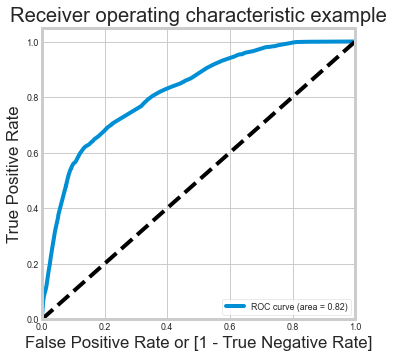

In [144]:
draw_roc(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

In [583]:
X_train.head()

,policy_term,premium_term,premium,policy_type_c,sum_assured_c,gender_c,annual_income_c,count_of_concern,count_of_complaint,premium_frequency_Monthly,premium_frequency_Quarterly,premium_frequency_Semi Annual,premium_frequency_Single,payment_method_Automated Clearing House,payment_method_Cheque,payment_method_Credit Card,payment_method_Direct Billing (Cash),payment_method_Direct Debits,payment_method_ECS,payment_method_NEFT,payment_method_Others,marital_status_c_Others,marital_status_c_Single,marital_status_c_UnMarried,marital_status_c_divorce,marital_status_c_widow
110521,0.041667,0.019178,-0.085174,1,-0.467299,1,0.168732,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
55405,0.055556,0.054795,0.440085,1,-0.149598,0,0.239611,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1408670,0.100000,0.098630,-0.394044,0,-0.221559,1,-0.114782,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1288674,0.333333,0.331507,0.271950,0,0.827881,1,-0.114782,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
875255,0.200000,0.200000,0.707529,0,0.623255,1,-0.114782,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


CatBoost is a machine learning algorithm that uses gradient boosting on decision trees. It is available as an open source library.More
details can be found at https://catboost.ai/docs/concepts/about.html

In [145]:
#checking with CatBoost classifier
from catboost import CatBoostClassifier


In [146]:
model = CatBoostClassifier(iterations=1000, l2_leaf_reg =4,depth = 10)

In [147]:
model.fit(X_train[features], y_train, verbose=False)

In [597]:
predict_test = model.predict(X_test)

In [598]:
lg_metrics(confusion_matrix(y_test,predict_test))

Model Accuracy value is              :  64.03 %
Model Sensitivity value is           :  16.42 %
Model Specificity value is           :  83.14 %
Model Precision value is             :  28.11 %
Model Recall value is                :  16.42 %
Model True Positive Rate (TPR)       :  16.42 %
Model False Positive Rate (FPR)      :  16.86 %
Model Poitive Prediction Value is    :  28.11 %
Model Negative Prediction value is   :  71.25 %


In [149]:
#checking with random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1, max_depth =15)
forest.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000, n_jobs=-1,
                       random_state=0)

In [151]:
predict_test = forest.predict(X_test[features])

In [152]:
lg_metrics(confusion_matrix(y_test,predict_test))

Model Accuracy value is              :  80.79 %
Model Sensitivity value is           :  56.82 %
Model Specificity value is           :  90.4 %
Model Precision value is             :  70.38 %
Model Recall value is                :  56.82 %
Model True Positive Rate (TPR)       :  56.82 %
Model False Positive Rate (FPR)      :  9.6 %
Model Poitive Prediction Value is    :  70.38 %
Model Negative Prediction value is   :  83.91 %


In [153]:
#checking with random forest with increased depth and estimators
forest1 = RandomForestClassifier(n_estimators=2000,random_state=0,n_jobs=-1, max_depth =30)
forest1.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=30, n_estimators=2000, n_jobs=-1,
                       random_state=0)

In [156]:
predict_test = forest1.predict(X_test[features])

In [157]:
lg_metrics(confusion_matrix(y_test,predict_test))

Model Accuracy value is              :  78.28 %
Model Sensitivity value is           :  55.83 %
Model Specificity value is           :  87.28 %
Model Precision value is             :  63.79 %
Model Recall value is                :  55.83 %
Model True Positive Rate (TPR)       :  55.83 %
Model False Positive Rate (FPR)      :  12.72 %
Model Poitive Prediction Value is    :  63.79 %
Model Negative Prediction value is   :  83.12 %


In [158]:
#removing premium term as it has highest VIF
features.remove('premium_term')

In [159]:
log_model2, X_train_sm2 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          policy_status   No. Observations:              1122440
Model:                            GLM   Df Residuals:                  1122420
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.0627e+05
Date:                Mon, 08 Feb 2021   Deviance:                   1.0125e+06
Time:                        15:54:30   Pearson chi2:                 1.10e+16
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -4.0436      0.305    -13.253      0.000      -4.642      -3.446
policy_term                                 2.2326      0.019    117.534      0.000       2.195       2.270
policy_type_c                               4.1948      0.304     13.792      0.000       3.599       4.791
annual_income_c                            -0.2313      0.012    -19.834      0.000      -0.254      -0.208
count_of_concern                           -0.8531      0.054    -15.749      0.000      -0.959      -0.747
count_of_complaint                          0.6699      0.025     26.707      0.000       0.621       0.719
premium_frequency_Monthly                  -0.3432      0.011    -32.335      0.000      -0.364      -0.322
premium_frequency_Quarterly                 1.6281      0.042     38.572      0.000       1.545       1.711
premium_frequency_Semi Annual               0.5786      0.015     38.703      0.000       0.549       0.608
premium_frequency_Single                   -3.1991      0.038    -84.737      0.000      -3.273      -3.125
payment_method_Automated Clearing House    -0.6686      0.024    -28.012      0.000      -0.715      -0.622
payment_method_Cheque                       0.5432      0.024     22.935      0.000       0.497       0.590
payment_method_Credit Card                 -1.8514      0.069    -26.802      0.000      -1.987      -1.716
payment_method_Direct Billing (Cash)        0.3977      0.043      9.195      0.000       0.313       0.482
payment_method_Direct Debits               -1.1424      0.024    -48.306      0.000      -1.189      -1.096
payment_method_ECS                         -0.4374      0.027    -16.352      0.000      -0.490      -0.385
payment_method_NEFT                         4.5294      0.303     14.955      0.000       3.936       5.123
payment_method_Others                       3.6554      0.303     12.070      0.000       3.062       4.249
marital_status_c_Single                    -0.3535      0.013    -26.268      0.000      -0.380      -0.327
marital_status_c_widow                     -0.2395      0.030     -8.062      0.000      -0.298      -0.181
===========================================================================================================
"""

In [161]:
y_train_pred = log_model2.predict(X_train_sm2)
y_train_pred[:10]

110521     0.678817
55405      0.681995
1408670    0.034307
1288674    0.125373
875255     0.096199
1074852    0.079847
211493     0.695351
38917      0.809155
1036136    0.172160
925776     0.111816
dtype: float64

In [162]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
110521,0,0.678817,110521
55405,0,0.681995,55405
1408670,0,0.034307,1408670
1288674,0,0.125373,1288674
875255,0,0.096199,875255


In [163]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
110521,0,0.678817,110521,1,1,1,1,1,1,1,0,0,0
55405,0,0.681995,55405,1,1,1,1,1,1,1,0,0,0
1408670,0,0.034307,1408670,1,0,0,0,0,0,0,0,0,0
1288674,0,0.125373,1288674,1,1,0,0,0,0,0,0,0,0
875255,0,0.096199,875255,1,0,0,0,0,0,0,0,0,0


In [164]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

,prob,accuracy,sensi,speci,Precision,Recall
0.0,0.0,0.286890,1.000000,0.000000,1.000000,0.000000
0.1,0.1,0.537692,0.952611,0.370766,0.378521,0.952611
0.2,0.2,0.636904,0.853328,0.549836,0.432660,0.853328
0.3,0.3,0.767547,0.674421,0.805013,0.581853,0.674421
0.4,0.4,0.801681,0.560685,0.898636,0.689954,0.560685
0.5,0.5,0.802724,0.543856,0.906868,0.701433,0.543856
0.6,0.6,0.802529,0.532484,0.911171,0.706885,0.532484
0.7,0.7,0.740719,0.133077,0.985179,0.783190,0.133077
0.8,0.8,0.725241,0.049945,0.996919,0.867055,0.049945
0.9,0.9,0.717226,0.015785,0.999422,0.916516,0.015785


<Figure size 1296x576 with 0 Axes>

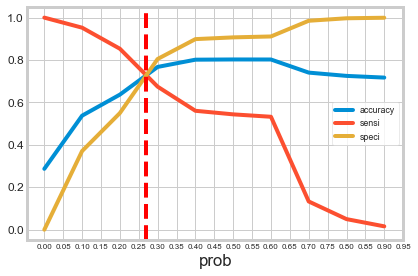

In [165]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.27, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

In [600]:
calculate_VIF(X_train[features])

,Features,VIF
8,premium_frequency_Single,52.38
1,policy_type_c,40.79
15,payment_method_NEFT,29.38
16,payment_method_Others,26.39
10,payment_method_Cheque,20.76
13,payment_method_Direct Debits,13.45
9,payment_method_Automated Clearing House,6.82
0,policy_term,5.25
5,premium_frequency_Monthly,4.15
12,payment_method_Direct Billing (Cash),3.15


In [ ]:
#removing premium frequency single 
features.remove('premium_frequency_Single')

In [602]:
calculate_VIF(X_train[features])

,Features,VIF
1,policy_type_c,35.48
9,payment_method_Cheque,17.52
12,payment_method_Direct Debits,12.14
8,payment_method_Automated Clearing House,6.10
0,policy_term,5.25
5,premium_frequency_Monthly,4.14
14,payment_method_NEFT,4.02
13,payment_method_ECS,2.61
15,payment_method_Others,1.96
11,payment_method_Direct Billing (Cash),1.81


In [177]:
#checking with catboost
model.fit(X_train[features], y_train, verbose=False)

In [178]:
predict_test = model.predict(X_train)

In [179]:
lg_metrics(confusion_matrix(y_train,predict_test))

Model Accuracy value is              :  80.51 %
Model Sensitivity value is           :  55.36 %
Model Specificity value is           :  90.63 %
Model Precision value is             :  70.38 %
Model Recall value is                :  55.36 %
Model True Positive Rate (TPR)       :  55.36 %
Model False Positive Rate (FPR)      :  9.37 %
Model Poitive Prediction Value is    :  70.38 %
Model Negative Prediction value is   :  83.46 %


In [ ]:
features.remove('policy_type_c')
calculate_VIF(X_train[features])

In [609]:
model.fit(X_train[features], y_train, verbose=False)

In [183]:
predict_test = model.predict(X_train)

In [184]:
lg_metrics(confusion_matrix(y_train,predict_test))

Model Accuracy value is              :  80.51 %
Model Sensitivity value is           :  55.36 %
Model Specificity value is           :  90.63 %
Model Precision value is             :  70.38 %
Model Recall value is                :  55.36 %
Model True Positive Rate (TPR)       :  55.36 %
Model False Positive Rate (FPR)      :  9.37 %
Model Poitive Prediction Value is    :  70.38 %
Model Negative Prediction value is   :  83.46 %


In [168]:
#checking with logistic regression with decreased feature
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          policy_status   No. Observations:              1122440
Model:                            GLM   Df Residuals:                  1122422
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.2023e+05
Date:                Mon, 08 Feb 2021   Deviance:                   1.0405e+06
Time:                        16:01:58   Pearson chi2:                 9.06e+15
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0610      0.022     -2.730      0.006      -0.105      -0.017
policy_term                                 2.0536      0.019    109.893      0.000       2.017       2.090
annual_income_c                            -0.2221      0.011    -20.336      0.000      -0.243      -0.201
count_of_concern                           -0.7953      0.054    -14.775      0.000      -0.901      -0.690
count_of_complaint                          0.7120      0.025     28.645      0.000       0.663       0.761
premium_frequency_Monthly                  -0.3109      0.011    -29.318      0.000      -0.332      -0.290
premium_frequency_Quarterly                 1.7712      0.042     42.028      0.000       1.689       1.854
premium_frequency_Semi Annual               0.7197      0.015     48.503      0.000       0.691       0.749
payment_method_Automated Clearing House    -0.4676      0.023    -20.372      0.000      -0.513      -0.423
payment_method_Cheque                       0.6045      0.023     26.697      0.000       0.560       0.649
payment_method_Credit Card                 -1.6635      0.069    -24.167      0.000      -1.798      -1.529
payment_method_Direct Billing (Cash)       -1.6301      0.033    -49.559      0.000      -1.695      -1.566
payment_method_Direct Debits               -0.9530      0.023    -41.715      0.000      -0.998      -0.908
payment_method_ECS                         -0.2503      0.026     -9.612      0.000      -0.301      -0.199
payment_method_NEFT                        -2.5465      0.025   -101.422      0.000      -2.596      -2.497
payment_method_Others                      -3.4543      0.025   -139.567      0.000      -3.503      -3.406
marital_status_c_Single                    -0.3294      0.013    -24.523      0.000      -0.356      -0.303
marital_status_c_widow                     -0.2446      0.029     -8.488      0.000      -0.301      -0.188
===========================================================================================================
"""

In [169]:
y_train_pred = log_model3.predict(X_train_sm3)


In [170]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
110521,0,0.643729,110521
55405,0,0.646655,55405
1408670,0,0.036109,1408670
1288674,0,0.130392,1288674
875255,0,0.102357,875255


In [171]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
110521,0,0.643729,110521,1,1,1,1,1,1,1,0,0,0
55405,0,0.646655,55405,1,1,1,1,1,1,1,0,0,0
1408670,0,0.036109,1408670,1,0,0,0,0,0,0,0,0,0
1288674,0,0.130392,1288674,1,1,0,0,0,0,0,0,0,0
875255,0,0.102357,875255,1,1,0,0,0,0,0,0,0,0


In [172]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

,prob,accuracy,sensi,speci,Precision,Recall
0.0,0.0,0.286890,1.000000,0.000000,1.000000,0.000000
0.1,0.1,0.520215,0.958005,0.344088,0.370118,0.958005
0.2,0.2,0.625983,0.850468,0.535671,0.424252,0.850468
0.3,0.3,0.762966,0.661009,0.803984,0.575672,0.661009
0.4,0.4,0.790368,0.556039,0.884641,0.659766,0.556039
0.5,0.5,0.792436,0.537658,0.894936,0.673072,0.537658
0.6,0.6,0.792293,0.524814,0.899902,0.678384,0.524814
0.7,0.7,0.732085,0.094135,0.988738,0.770794,0.094135
0.8,0.8,0.721163,0.032865,0.998071,0.872681,0.032865
0.9,0.9,0.717190,0.015667,0.999419,0.915608,0.015667


<Figure size 1296x576 with 0 Axes>

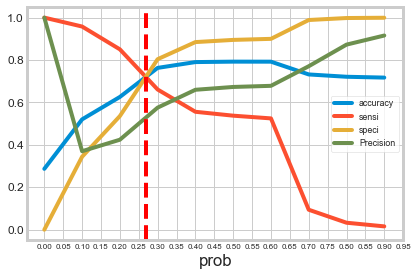

In [174]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','Precision'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.27, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

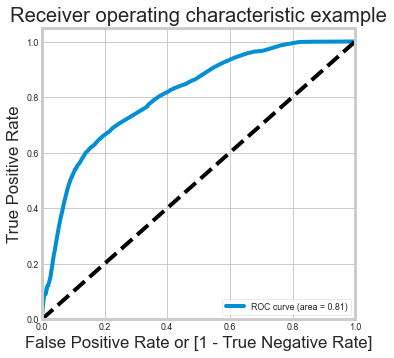

In [175]:
draw_roc(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

In [192]:
#checking for random forest with the entire dataset without excluding any features
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1, max_depth =10)
forest.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1,
                       random_state=0)

In [200]:
predict_test = forest.predict(X_train)

In [201]:
lg_metrics(confusion_matrix(y_train,predict_test))

Model Accuracy value is              :  83.44 %
Model Sensitivity value is           :  55.61 %
Model Specificity value is           :  94.63 %
Model Precision value is             :  80.65 %
Model Recall value is                :  55.61 %
Model True Positive Rate (TPR)       :  55.61 %
Model False Positive Rate (FPR)      :  5.37 %
Model Poitive Prediction Value is    :  80.65 %
Model Negative Prediction value is   :  84.12 %


In [202]:
predict_test = forest.predict(X_test)

In [203]:
lg_metrics(confusion_matrix(y_test,predict_test))

Model Accuracy value is              :  83.45 %
Model Sensitivity value is           :  55.93 %
Model Specificity value is           :  94.49 %
Model Precision value is             :  80.3 %
Model Recall value is                :  55.93 %
Model True Positive Rate (TPR)       :  55.93 %
Model False Positive Rate (FPR)      :  5.51 %
Model Poitive Prediction Value is    :  80.3 %
Model Negative Prediction value is   :  84.23 %


Text(0.5, 0, 'Random Forest Feature Importance')

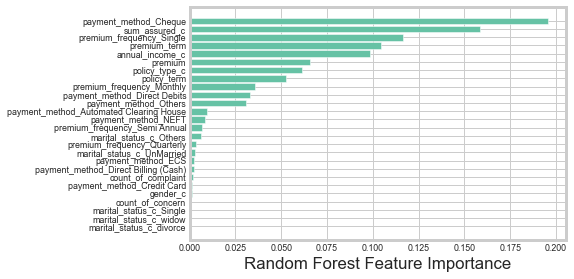

In [645]:
sorted_idx = forest.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [649]:
perm_importance = permutation_importance(forest, X_test, y_test)


Text(0.5, 0, 'Permutation Importance')

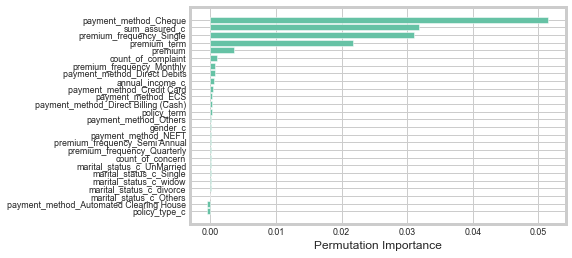

In [650]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          the plot above is showing the random forest feature importance and permutation based feature importance
    </span>    
</div>



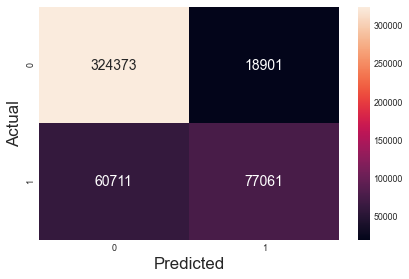

In [204]:
#confusion matrix for random forest
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
#data_['conv_real'] = y
#data_['predicted'] = predict_test

#bar = .70

#d= data_['predicted'].apply(lambda x: 1 if x>bar else 0)

confusion_matrix_ = pd.crosstab(y_test, predict_test, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_, annot=True, fmt = 'g')
plt.show()
#confusion_matrix(d, data1['conv_real'])

<img src="files/result.jpg" width="1000" height="1000">


<img src="files/thanku.jpg" width="1000" height="600">
